# **NOTE for Colab Users**

# **Do NOT write directly in this file—your work might be lost!**

# **Always make a copy before you start.**

How to make a copy

1. Click "File" in the top left.
> *If you can’t find the header (like “File” or "Runtime"), click the “v” mark at the top right to show it.*

2. "Save a copy in Drive"

3. Change the copied file’s name to “YOURNAMEs\_FileName.ipynb”.
> Ex: If your name is Olivia : Olivias_FileName.ipynb

4. Set your runtime to **CPU**. T4 GPU resets your session more often than CPU.<br>
So, it’s best to use the CPU runtime unless you need GPU for training.<br>
Check out this [Video](https://youtu.be/XRmI-qRiFFw).<br>

> If you switch the runtime halfway, you have to rerun all cells from the start.<br>
> Please pick your runtime before you begin.<br>
> *Rerunning cells: Click “Runtime” (top left) → Then click “Run before”.*<br>

---

* Check marks (✅) won’t be saved. If you reload the page with Chrome’s refresh button, they’ll disappear.<br>
If you want to pause and come back later, just add a text cell and write something like “SO FAR DONE.”

---

* In Colab, **previous outputs reset every 30 to 90 minutes**.<br>
  Because of this, errors like `~~ is not defined` will happen **very often**.

  🔁 What to do when you get an `~~is not defined` error
  1. First, make sure your variable is spelled right.<br>
  2. If it’s spelled right but you still see the error, **click the cell you want to restart**.<br>
  3. Go to “Runtime” (top left) → Click “Run before”.<br>
    → This will **re-run all previous cells**.
  4. Run the cell again.

  If you still see the error after these steps,<br>
  there might be a basic mistake in your TODO answers from earlier cells.<br>
  Please check if your answer is right.<br>
  Or ask ChatGPT or another coding assistant for help.

# **Preparation**

This section only loads content from earlier chapters.<br>
Just run the code—you don’t need to read it.<br>
Feel free to skip ahead.<br>

In [ ]:
# Donwload the file
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# Load the file called input.text that you just downloaded in utf-8.
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# A Function to Display Tensors Nicely (Feel Free to Skip This)
import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("name", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """

    # Determine tensor and name from arguments
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Convert Tensor to List
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """Formatting a recursively nested list and returning a string"""
        # If the contents are lists, then re-return
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # For numerical lists
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # Formatted string (bar brackets on outermost frames are removed)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # Result output
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # Define an embedded table for vocabulary number x number of embedding dimensions
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # Get the embedded vector corresponding to the input index
        return self.token_embedding_table.forward(input_indices)

# Defining a Position Embedded Module
class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length, embedding_dim):
        super().__init__()
        # Location embedding layer
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        sequence_length = input_indices.shape[1]  # Get sequence length
        position_indices = torch.arange(sequence_length, device=input_indices.device)  # Position index generation
        position_embeddings = self.position_embedding_layer(position_indices)  # Position embedding
        return position_embeddings

class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # Embedded layer for each token
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)

    def forward(self, input_indices):
        # Get token embedding
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # Get location embedding
        position_embeddings = self.position_embedding_layer.forward(input_indices)

        # Adding token embedding and position embedding
        embeddings = token_embeddings + position_embeddings
        return embeddings

# Configuration class that stores model settings
class ModelConfig:
    batch_size = 1  # Number of data to process at a time (batch size)
    input_sequence_length = 8  # Length of input data (sequence length)
    embedding_dim = 8  # Embedded layer size (number of dimensions of feature vector)

torch.manual_seed(1337)

# Creating a ModelConfig instance. No configuration parameters (constructors).
config = ModelConfig()

# Creating an EmbeddingModule instance. The configuration parameters are the number of vocabulary and the config instance.
embedding_module = EmbeddingModule(vocab_size = 65, config = config)

# Compatible with Let's he. (Batch size, token length) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])
embeddings = embedding_module.forward(sample_input_tokens)

layer_norm = nn.LayerNorm(config.embedding_dim) # The default values ​​are not explicitly used, and the eps and norm_dim are used.
norm_embeddings = layer_norm(embeddings)
print_formatted_tensor("norm_embeddings", norm_embeddings)

# **Chapter 6: AttentionHead**

### **Section 1: Basic Knowledge**

The formula for Attention

$$
{Attention}(Q, K, V) = {softmax}\left(\frac{QK^\mathsf{T}}{\sqrt{d_k}}\right)V
$$

**Don’t spend too much time on the math formulas.**

*Do NOT Understand. Imagine how you can reinvent the idea naturally.*

Real learning means gaining a mindset that, if you traveled back to 2017 in a time machine,

you could naturally *reinvent* **"Attention is all you need"** without those formulas.

The key is to ask yourself:
> If you lived back then, could you come up with the same idea?

This is very important.

---

Using Token Embedding and Position Embedding, characters (or words) can be turned into 8-dimensional vectors.

But at this stage, the relationship between tokens isn’t considered.<br>

For example, if you only use Token Embedding and Position Embedding,

the third character (t) in "Let's he”and the third character (t) in "Cat sits" get treated as the same vector.<br>

<br>

So, how do you embed tokens based on their context?<br>
<br>

This is where **Self-Attention** comes in.<br>

Before Self-Attention, intra-attention was used as a helper method in RNNs to capture relationships between elements in a sequence.<br>

Also, the 2017 paper **"Attention is All You Need"** (Vaswani et al., 2017) introduced Source-Target Attention for English-French translation tasks. This paper was the first invention of Transformer algorithm. It showed outstanding ability to capture long context.<br>
<br>

Given this background, it makes perfect sense to use Self-Attention to create embeddings that reflect context.<br>

**`Chapter 6: AttentionHead Class Section 0 Basics`** <label><input type="checkbox"> Mark as Done</label>

### **Section 2: Self-Attention**  
### **Token (Character or Word) Embeddings in Context**

Don't sweat the details. For now, just watch this [video](https://youtu.be/i4j2CvasqKw).⚙️ Use the gear icon to adjust the resolution.


- 2 mintues, no-audio
- video_id = "i4j2CvasqKw"

#### **Contextual Embedding Vectors**

How do you create embedding vectors that capture the meaning of a whole sentence?  

First, you already have "word-by-word embedding vectors."

But these alone don’t show the flow or relationships between words in a sentence.

For example, take the word "love" in the sentence "I love you."

By itself, it just means "to love."  There is no relation between "I" and "you".

To create embeddings that fit the context, you need to **blend the word embeddings smartly**.

---

### **Mixing Word Embeddings?**

So, how do you make embeddings reflect the context?  

A simple way is to **mix (combine) different word embeddings**.

Let’s say each word embedding looks like this:

| Word  | Embedding Vector |
|-------|------------------|
| **I**     | `[1, 0, 2]`    |
| **love**  | `[2, 0, 1]`    |
| **you**   | `[2, 1, 0]`    |
(This is just a sample vector for explanation)

Right now, you know each word’s info, but not the **sentence flow**.

So, by **adding these embedding vectors with some weights**, you create a new embedding that captures the context.

---

### **Thinking in Math**

The "mixing word embeddings" looks like this in math:

$$
w_1 \times [1, 0, 2] + w_2 \times [2, 0, 1] + w_3 \times [2, 1, 0]
$$

What does this mean?

- $w_1, w_2, w_3$ are "weights" showing how much each word affects the sentence meaning.
- For example, "I" might have less impact, so $w_1$ is small. But "love" is important, so $w_2$ is bigger.
- By **adding vectors weighted by their importance**, you get an embedding vector that fits the context.

**Almost all questions about Attention boil down to this mixing formula, so keep it close in mind.**

---

The tricky part is how to decide the mixing ratios: $w_1$, $w_2$, and $w_3$.

---

#### **What Is “Context”?**

So far, the idea of “mixing word embeddings based on context” has been introduced.<br>But what exactly is “context”?  
Actually, which words matter and how much, changes depending on your viewpoint (context).

---

## **1. Word Importance Changes With Context**  
For example, think about the sentence “I love you.”

- In the context of **“Who do I like?”**, the word `you` is most important.  
- In the context of **“How do I feel about you?”**, the word `love` is most important.

This means which word matters depends on the viewpoint (context).

However, in practice, it’s hard to create a specific question like “How do I feel about you?”<br>So, let’s keep it simple: **use the words themselves in the sentence as the context.**  
If it’s still vague, don’t worry! A clearer explanation is coming next.

---

## **2. Thinking From the Viewpoint of “I”**  
If looking from the viewpoint of “I,” which word in `I love you` is the most important?

1. The word `I` itself is **most important** from the “I” viewpoint.  
2. Next comes `love`.  
   - When you have the subject (`I`), you can usually guess the object (`you` or `it`).  
   - But the verb (`love`) can change a lot.  
   - For example, in “I love you” it’s `love`, but in “I see you” it’s `see`.  
   - So from “I”’s viewpoint, **what happens (the verb)** is the key!  
3. Lastly, `you`.  
   - The object (`you`) often falls into place naturally based on context.

If you put this into numbers, imagine the weights as **`w1:w2:w3 = 5:4:2`**.

Mixing embedding vectors with these weights builds a new vector.<br>
This new vector fits the context seen from “I.”

> *NOTE: This is just an analogy to illustrate how the importance of each word can vary depending on the perspective.*<br>*It's not meant to reflect the actual behavior precisely.*

---

## **3. Expressing It With Math**  
The embedding vector seen from “I” can be calculated as:

$$
w_1 \times [1, 0, 2] + w_2 \times [2, 0, 1] + w_3 \times [2, 1, 0]
$$

Using the example weights:

$$
5 \times [1, 0, 2] + 4 \times [2, 0, 1] + 2 \times [2, 1, 0]
$$

Calculate this to get the new embedding vector from “I”'s viewpoint.<br>
> *NOTE: Usually, weights (mixing ratios)  should sum to 1 by normalization, but skipping here to keep the idea simple.*

---

## **4. Automatically Choosing Word Importance for Each Context**  
Manually setting the values of **`w1:w2:w3` each time is tough, right?**  
So, let’s find a way to automatically decide “Which words matter in context?”

### **▶️ Use the “Dot Product”**  
From the viewpoint of the word `I`:

- How related is `I` to `I`?  
- How related is `I` to `love`?  
- How related is `I` to `you`?  

You can measure how related words are **using the dot product of their vectors**.

Let me remind you of the [Word2Vec](https://youtu.be/wvsE8jm1GzE)¹
- 3 minutes, English-audio
- video_id = "wvsE8jm1GzE"

---

Content Reference:  
¹ **Google Developers**, “Word2Vec Explained (Distributed Representations – Visualizing High-Dimensional Space),” YouTube, 6:24, Jun. 23, 2016. Accessed July 8, 2025.

---

Similar words have similar vectors, so the dot product between them is large.

- Large dot product → Strong relation (important word)  
- Small dot product → Weak relation (less important word)

So,

You can calculate how important each word is from the viewpoint of `I`:

$$
w_1^I = I \cdot I, \quad w_2^I = I \cdot love, \quad w_3^I = I \cdot you
$$

You can do the same from the viewpoint of `love`:

$$
w_1^{love} = love \cdot I, \quad w_2^{love} = love \cdot love, \quad w_3^{love} = love \cdot you
$$

And from the viewpoint of `you`:

$$
w_1^{you} = you \cdot I, \quad w_2^{you} = you \cdot love, \quad w_3^{you} = you \cdot you
$$

This gives you embedding vectors that match each word’s context perfectly.

So far, the focus has been on “How to mix words from the viewpoint of `I`?” to create new embedding vectors.

But that only considers the viewpoint of `I`.

Self-Attention treats **every word in the sentence as its own viewpoint (= query)**.

In other words, it calculates the meaning of the sentence from each word’s perspective.

For example, take the 3-word sentence, “I love you.”

* The mixed vector from the viewpoint of `I`  
* The mixed vector from the viewpoint of `love`  
* The mixed vector from the viewpoint of `you`

This way, each of the 3 viewpoints creates a different embedding vector.

Assume the words `I`, `love`, and `you` are all 3-dimensional vectors.

Putting those three vectors together forms a **3×3 “query tensor”**.

The word “query” means question, but here it means “viewpoint.”

$$
Q =
\begin{bmatrix}
query_{I} \\
query_{\text{love}} \\
query_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 2 \\
2 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

---

The original word vectors for `I`, `love`, and `you` are called the **value tensor**.

$$
V =
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 2 \\
2 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

<br>
<br>

Calculating the mixed vector looks like this:

$$
\begin{bmatrix}
w_1 & w_2 & w_3
\end{bmatrix}
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}
$$

$$
= w_1 * value_{I} + w_2 * value_{\text{love}} + w_3 * value_{\text{you}}
$$

$$
= w_1 * [1, 0, 2] + w_2 * [2, 0, 1] + w_3 * [2, 1, 0]
$$

---

To determine the coefficients $w_1$, $w_2$, and $w_3$ based on the context (query tensor), use the relevance between each word.

<br>

You can calculate how important each word is from the viewpoint of `I`:

$$
w_1^{I} = I \cdot I, \quad w_2^{I} = I \cdot love, \quad w_3^{I} = I \cdot you
$$

You can do the same from the viewpoint of `love`:

$$
w_1^{love} = love \cdot I, \quad w_2^{love} = love \cdot love, \quad w_3^{love} = love \cdot you
$$

And from the viewpoint of `you`:

$$
w_1^{you} = you \cdot I, \quad w_2^{you} = you \cdot love, \quad w_3^{you} = you \cdot you
$$

In Table:

$$
\begin{array}{c|ccc}
\text{Query} \backslash \text{Key} & I & \text{love} & \text{you} \\
\hline
I & I \cdot I & I \cdot \text{love} & I \cdot \text{you} \\
\text{love} & \text{love} \cdot I & \text{love} \cdot \text{love} & \text{love} \cdot \text{you} \\
\text{you} & \text{you} \cdot I & \text{you} \cdot \text{love} & \text{you} \cdot \text{you}
\end{array}
$$

At this step, the **embedding used as the reference for the inner product** is called the **key tensor**.

Usually, a tensor with the **same data as the value tensor (source)** is used for this.  

$$
K =
\begin{bmatrix}
key_{I} \\
key_{\text{love}} \\
key_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 2 \\
2 & 0 & 1 \\
2 & 1 & 0
\end{bmatrix}
$$

The key tensor has the same values as the value tensor, but it plays a different role:

- The key determines how relevant each word is to the query, and is used to compute the mixing weights for the value tensor.
- The value carries the actual content or meaning to be combined based on those weights.


**Matrix representation of queries and keys**

$$
Q =
\begin{bmatrix}
q_{I} \\
q_{\text{love}} \\
q_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
I \\
\text{love} \\
\text{you}
\end{bmatrix}
$$

$$
K =
\begin{bmatrix}
k_{I} \\
k_{\text{love}} \\
k_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
I \\
\text{love} \\
\text{you}
\end{bmatrix}
$$

**Expansion of the matrix multiplication**

$$
W = QK^T =
\begin{bmatrix}
q_{I} \\
q_{\text{love}} \\
q_{\text{you}}
\end{bmatrix}
\begin{bmatrix}
k_{I} & k_{\text{love}} & k_{\text{you}}
\end{bmatrix}
=
\begin{bmatrix}
q_I \cdot k_I & q_I \cdot k_{\text{love}} & q_I \cdot k_{\text{you}} \\
q_{\text{love}} \cdot k_I & q_{\text{love}} \cdot k_{\text{love}} & q_{\text{love}} \cdot k_{\text{you}} \\
q_{\text{you}} \cdot k_I & q_{\text{you}} \cdot k_{\text{love}} & q_{\text{you}} \cdot k_{\text{you}}
\end{bmatrix}
$$

<br>

$$
W = QK^T =
\begin{bmatrix}
I \cdot I & I \cdot \text{love} & I \cdot \text{you} \\
\text{love} \cdot I & \text{love} \cdot \text{love} & \text{love} \cdot \text{you} \\
\text{you} \cdot I & \text{you} \cdot \text{love} & \text{you} \cdot \text{you}
\end{bmatrix}
$$

**Components of the weight matrix \$W\$**

$$
W =
\begin{bmatrix}
w_1^{I} & w_2^{I} & w_3^{I} \\
w_1^{\text{love}} & w_2^{\text{love}} & w_3^{\text{love}} \\
w_1^{\text{you}} & w_2^{\text{you}} & w_3^{\text{you}}
\end{bmatrix}
$$




---

The query tensor, value tensor, and key tensor all have matching numbers.<br>However, they carry different meanings.<br>


**Summary**

✅ **Context means which words you consider important—it changes with viewpoint.**  
✅ **Mixing ratios of embeddings ($w_1, w_2, w_3$) shift depending on context.**  
✅ **Dot products of vectors can calculate word importance automatically.**  
✅ **This lets you build context-aware embedding vectors on the fly!**

This is **the heart of attention!** 🚀

In [ ]:
import torch

Query = torch.tensor([[1,0,2],
                      [2,0,1],
                      [2,1,0]])

Value = torch.tensor([[1,0,2],
                      [2,0,1],
                      [2,1,0]])

Key = torch.tensor([[1,0,2],
                    [2,0,1],
                    [2,1,0]])

$$
w_1 = query_{\text{I}} \cdot key_{\text{I}}, \quad w_2 = query_{\text{I}} \cdot key_{\text{love}}, \quad w_3 = query_{\text{I}} \cdot key_{\text{you}}
$$

In [ ]:
# Calculate the inner product of query_I and key tensor, and calculate k1, k2, k3 from the context (viewpoint) of `I`
query_I = Query[0] # torch.tensor([1,0,2])

key_I = Key[0] # torch.tensor([1,0,2])
key_love = Key[1] # torch.tensor([2,0,1])
key_you = Key[2] # torch.tensor([2,1,0])

w1 = # TODO: Calculate w1. Tip: A*B - torch.dot(A, B)
w2 = # TODO: Calculate w2. Tip: A*B - torch.dot(A, B)
w3 = # TODO: Calculate w3. Tip: A*B - torch.dot(A, B)

print("w1", w1)
print("w2", w2)
print("w3", w3)

Mixing from the perspective of $query_I$


$$
w_1 * value_{I} + w_2 * value_{\text{love}} + w_3 * value_{\text{you}}
$$

In [ ]:
value_I = Value[0]
value_love = Value[1]
value_you = Value[2]

attention_output_query_I = # TODO: Write the above formula
print("attention_output_query_I", attention_output_query_I)

Mixing from the perspective of $$query_{\text{love}}$$

In [ ]:
query_love = Query[1]
w1_query_love = torch.dot(query_love, key_I)
w2_query_love = torch.dot(query_love, key_love)
w3_query_love = torch.dot(query_love, key_you)

attention_output_query_love = # TODO:
print("attention_output_query_love", attention_output_query_love)

Mixing from the viewpoint of $$query_{\text{you}}$$

In [ ]:
query_you = Query[2]
w1_query_you = torch.dot(query_you, key_I)
w2_query_you = torch.dot(query_you, key_love)
w3_query_you = torch.dot(query_you, key_you)

attention_output_query_you = # TODO:
print("attention_output_query_you", attention_output_query_you)

You can calculate everything at once using the formula below.

\begin{align}
{AttentionOutput} &=
\left(\begin{bmatrix}
query_{I} \\
query_{\text{love}} \\
query_{\text{you}}
\end{bmatrix}
\begin{bmatrix}
key_{I}&key_{\text{love}}&key_{\text{you}}
\end{bmatrix}
\right)
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}\\
&=\begin{bmatrix}
query_{\text{I}} \cdot key_{I}&query_{\text{I}} \cdot key_{\text{love}}&query_{\text{I}} \cdot key_{\text{you}} \\
query_{\text{love}} \cdot key_{I}&query_{\text{love}} \cdot key_{\text{love}}&query_{\text{love}} \cdot key_{\text{you}} \\
query_{\text{you}} \cdot key_{I}&query_{\text{you}} \cdot key_{\text{love}}&query_{\text{you}} \cdot key_{\text{you}}
\end{bmatrix}
\begin{bmatrix}
value_{I} \\
value_{\text{love}} \\
value_{\text{you}}
\end{bmatrix}
\\ &= (Q K^T) V
\end{align}

$$
{AttentionOutput} = (Q K^T) V
$$


$Q K^T$ : `Query @ Key.T` or `torch.matmul(Query, Key.T)`

`torch.dot` only works for 1D tensors (vectors).

For matrix multiplication with 2D or higher tensors, use `@` or `torch.matmul`.

In [ ]:
QKT = # TODO: Q is Query, KT is Key.T
Output = # TODO: V is Value
print_formatted_tensor("Output", Output)

**`Check Point`** <label><input type="checkbox"> ← Check this box if the result above matches the answer below<label>

```
Output
Tensor Size: [3, 3]
tensor([
         [ 17.00,   2.00,  14.00],
         [ 22.00,   4.00,  13.00],
         [ 20.00,   5.00,   8.00]
       ])
```

Let's watch the [video](https://youtu.be/kRsnPcKkA0g) once again.

- 2 minutes, no-audio
- video_id = "kRsnPcKkA0g"

#### **Masked Self-Attention**

#### **Four Problems of Attention**

The basic formula of the attention mechanism looks like this:

$$
{AttentionOutput} = (Q K^T) V
$$

This formula means "calculate the relevance between query $Q$ and key $K$ to pick the right info from value $V$."  
But as it is, there are **four big problems**.


**Chapter 6: Section 2** <label><input type="checkbox"> Mark as done</label>

### **Section 3: Problem ① Dimension Scaling**  
### **The variance of the dot product grows too big and flattens out!**

Let's focus on the relationship between the dot product of queries and keys and the embedding vector's dimension.<br>

First, let's compare two cases: when the embedding dimension is 4 and when it is 64.<br>
Assume each element of the queries and keys is randomly generated from a standard normal distribution with a mean of 0 and variance of 1.<br>

In [ ]:
torch.manual_seed(1337)
dim4_query = # TODO: torch.randn(4): Random 4D vector (mean 0, std 1). "n" means a standard normal distribution.
dim4_key = # TODO: torch.randn(4): Random 4D vector (mean 0, std 1). "n" means a standard normal distribution.

print_formatted_tensor(dim4_query)
print_formatted_tensor(dim4_key)

In [ ]:
dot_products_4d = # TODO: Calculate the inner product of dim4_query and dim4_key
print("dot_products_4d\n", dot_products_4d)

Try changing the seed value and calculate with a different random value.

In [ ]:
torch.manual_seed(42)
dim4_query = torch.randn(4)
dim4_key = torch.randn(4)

dot_products_4d = dim4_query @ dim4_key
print("dot_products_4d\n", dot_products_4d)

Doing it only twice won't show the distribution. So try it 10,000 times and show the distribution of `dot_products_4d`.

In [ ]:
# The code below is a code that you can just try and display 10,000 times, so you can skip it.
# Functions that generate random vectors (standard normal distribution with mean 0 and variance 1)
import numpy as np
import matplotlib.pyplot as plt

def generate_random_vectors(dim, num_samples=10000):
    return np.random.randn(num_samples, dim)

# Functions that calculate the inner product
def compute_dot_products(vectors1, vectors2):
    return np.sum(vectors1 * vectors2, axis=1)

# Generate a 4-dimensional vector
dim_4 = 4

# Number of samples (10,000 to be statistically stable)
num_samples = 10000

# Generate random vectors
torch.manual_seed(1337)
vectors_4d_A = generate_random_vectors(dim_4, num_samples)
vectors_4d_B = generate_random_vectors(dim_4, num_samples)

# Calculate the inner product
dot_products_4d = compute_dot_products(vectors_4d_A, vectors_4d_B)

# Calculate mean and variance
mean_4d = np.mean(dot_products_4d)
var_4d = np.var(dot_products_4d)

# Create a histogram (4-dimensional vector only)
plt.figure(figsize=(6, 5))
plt.hist(dot_products_4d, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_4d, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_4d:.2f}, Variance: {var_4d:.2f}")
plt.title("Distribution of Dot Products (d_k = 4)")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# View graph
plt.show()

# Display calculation results
mean_4d, var_4d

# View graph
plt.show()

# Display calculation results
print("Mean", mean_4d)
print("Variance", var_4d)

**Next, try calculating the dot product between two 64-dimensional vectors.**

In [ ]:
torch.manual_seed(1337)
dim64_query = # TODO: Random 64D vector (mean 0, std 1)
dim64_key = # TODO: Random 64D vector (mean 0, std 1)

print_formatted_tensor(dim64_query)
print_formatted_tensor(dim64_key)

In [ ]:
dot_products_64d = # TODO: Inner product of dim64_query and dim64_key
print("dot_products_64d", dot_products_64d)

Huh, it's somehow bigger than in the 4D case.

Try with another seed.

In [ ]:
torch.manual_seed(57)
dim64_query = torch.randn(64)
dim64_key = torch.randn(64)
dot_products_64d = dim64_query @ dim64_key
print("dot_products_64d", dot_products_64d)

Huh, it's somehow smaller than in the 4D case.

Calculating one element of the dot product between 64-dimensional vectors sums 64 values,

so it can become much larger or smaller than in the 4-dimensional case.

For 64 dimensions, try 10,000 times and show the distribution.

In [ ]:
# Generate 64-dimensional vectors
dim_64 = 64

# Number of samples (10,000 to be statistically stable)
num_samples = 10000

# Generate random vectors
torch.manual_seed(1337)
vectors_64d_A = generate_random_vectors(dim_64, num_samples)
vecotors_64d_B = generate_random_vectors(dim_64, num_samples)

# Calculate the inner product
dot_products_64d = compute_dot_products(vectors_64d_A, vecotors_64d_B)

# Calculate mean and variance
mean_64d = np.mean(dot_products_64d)
var_64d = np.var(dot_products_64d)

# Create a histogram (64-dimensional vectors only)
plt.figure(figsize=(6, 5))
plt.hist(dot_products_64d, bins=50, alpha=0.7, color='green', edgecolor='black')
plt.axvline(mean_64d, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_64d:.2f}\nVariance: {var_64d:.2f}")
plt.title("Distribution of Dot Products (d_k = 64)")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# View graph
plt.show()

# Display calculation results
print("mean", mean_64d)
print("variance", var_64d)

Let’s try with 768 dimensions.  
768 dimensions is the embedding size of ChatGPT2-small.

In [ ]:
# Generate 768-dimensional vectors
dim_768 = 768

# Number of samples (10,000 to be statistically stable)
num_samples = 10000

# Generate random vectors
torch.manual_seed(1337)
vectors_768d_A = generate_random_vectors(dim_768, num_samples)
vectors_768d_B = generate_random_vectors(dim_768, num_samples)


# Calculate the inner product
dot_products_768d = compute_dot_products(vectors_768d_A, vectors_768d_B)

# Calculate mean and variance
mean_768d = np.mean(dot_products_768d)
var_768d = np.var(dot_products_768d)

# Create a histogram (768-dimensional vectors only)
plt.figure(figsize=(6, 5))
plt.hist(dot_products_768d, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(mean_768d, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_768d:.2f}\nVariance: {var_768d:.2f}")
plt.title("Distribution of Dot Products (d_k = 768)")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# View graph
plt.show()

# Display calculation results
print("mean:", mean_768d)
print("variance:", var_768d)

If query and key vectors are $d$-dimensional,

and each element is from a standard normal distribution,

what is the variance of their dot product?

Keep only the correct choices and delete all the others. (Double-click to edit!)

Variance: ①0.5d / ②d / ③2d # TODO

The variance of the dot product grows as the embedding dimension $d_k$ gets bigger.

The variance of the dot product roughly scales by about $d_k$.

Since the dot product sums $d_k$ terms, this makes perfect sense.

#### **Variance Gets Bigger**
When variance grows, **the dot product’s distribution flattens out and extreme values pop up more**.  

As extreme values show up more often, softmax gets risky.

It boosts large values even more, so one value can end up hogging all the attention.

> *NOTE: Don’t worry if this doesn’t click yet — it’ll all make sense soon.*

---

### The fix: divide by $$\sqrt{d_k}$$

---

Starting with the dot product $q \cdot k$ where $Var(q \cdot k) \approx d_k$,

<br>

$$
Var\!\Bigl(\frac{q \cdot k}{\sqrt{d_k}}\Bigr) = \frac{Var(q \cdot k)}{d_k} \approx \frac{d_k}{d_k} = 1
$$

In other words, **after scaling, the variance stays roughly 1 no matter the dimension $d_k$**, keeping things steady without wild swings.

### **Check with 64-Dimensional Data**

Run the code below to compare the distributions before scaling and after dividing by $\sqrt{d_k}$.

In [ ]:
# It's a code to display distribution, so you can skip it.
import numpy as np
import matplotlib.pyplot as plt

# Generate random 64-dimensional vectors (standard normal distribution)
num_samples = 10000
dim_64 = 64

torch.manual_seed(1337)
vectors_64d_A = np.random.randn(num_samples, dim_64)
vectors_64d_B = np.random.randn(num_samples, dim_64)

# Calculate the inner product
dot_products_64d = np.sum(vectors_64d_A * vectors_64d_B, axis=1)

# Apply scaling (divided by √d_k)
dot_products_64d_scaled = dot_products_64d / np.sqrt(dim_64)

# Histograms are displayed overlaid on one diagram
plt.figure(figsize=(8, 5))

# Histogram (no scaling)
plt.hist(dot_products_64d, bins=50, alpha=0.5, color='blue', edgecolor='black', label="No Scaling")

# Histogram (after dividing by √d_k)
plt.hist(dot_products_64d_scaled, bins=50, alpha=0.5, color='green', edgecolor='black', label="Scaled by sqrt(d_k)")

# Average and variance line (no scaling)
mean_64d = np.mean(dot_products_64d)
var_64d = np.var(dot_products_64d)
plt.axvline(mean_64d, color='blue', linestyle='dashed', linewidth=2, label=f"Mean (No Scaling): {mean_64d:.2f}")
plt.axvline(mean_64d + np.sqrt(var_64d), color='blue', linestyle='dotted', linewidth=1, label=f"Std Dev (No Scaling): ±{np.sqrt(var_64d):.2f}")
plt.axvline(mean_64d - np.sqrt(var_64d), color='blue', linestyle='dotted', linewidth=1)

# Average and variance line (after dividing by √d_k)
mean_64d_scaled = np.mean(dot_products_64d_scaled)
var_64d_scaled = np.var(dot_products_64d_scaled)
plt.axvline(mean_64d_scaled, color='green', linestyle='dashed', linewidth=2, label=f"Mean (Scaled): {mean_64d_scaled:.2f}")
plt.axvline(mean_64d_scaled + np.sqrt(var_64d_scaled), color='green', linestyle='dotted', linewidth=1, label=f"Std Dev (Scaled): ±{np.sqrt(var_64d_scaled):.2f}")
plt.axvline(mean_64d_scaled - np.sqrt(var_64d_scaled), color='green', linestyle='dotted', linewidth=1)

# Graph Settings
plt.title("Comparison of Dot Product Distributions")
plt.xlabel("Dot Product Value")
plt.ylabel("Frequency")
plt.legend()

# View graph
plt.show()

Scaling has reduced the variance, making it more compact.

$$
{AttentionWeights}(Q, K, V) = \frac{Q K^T}{\sqrt{d_k}}
$$

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# Query, Value, Key definition
Query = Value = Key = torch.tensor([[1., 0., 2.],
                                    [2., 0., 1.],
                                    [2., 1., 0.]])
dk = 3

# Calculating Attention
# Generally, division is not preferred, so we will use the form of multiplication.
AttentionWeights = # TODO: Write the above formula. Use dk**(-0.5).
print_formatted_tensor(AttentionWeights)

**`Check Point`** <label><input type="checkbox"> ← Check this box if the result above matches the answer below<label>

```
Tensor Size: [3, 3]
tensor([
         [  2.89,   2.31,   1.15],
         [  2.31,   2.89,   2.31],
         [  1.15,   2.31,   2.89]
       ])
```

$$
{AttentionOutput}(Q, K, V) = \left(\frac{Q K^T}{\sqrt{d_k}}\right) V
$$

In [ ]:
# Calculating Attention
AttentionOutput = # TODO: Implement the above formula.

# View Results
print_formatted_tensor(AttentionOutput)

✅ **When the dot product variance gets too big, the distribution flattens out, and extreme values increase.**<br>
✅ **Dividing by the square root of $d_k$ keeps the variance at 1, no matter the dimension!**<br>
✅ **This makes attention calculations stable and helps them work properly.**<br>

Thanks to this scaling, **Transformers run smoothly at any dimension size.**

**`Chapter 6: Section 4: Problem ① Dimension Scaling`** <label><input type="checkbox"> Mark as Done</label>

### **Section 4: Problem ② Normalization**


#### **The Idea of Normalization**  
#### **How to Get the Embedding Vector "From I's Viewpoint"**

Let's explain using the example from the last section.  
To get the embedding vector "from I's viewpoint,"  
**mix each word's embedding vector with the right weights.**  
First, let's start with the simplest way.

### **1. Add Without Normalization First**  
For example, say the scores from the inner product with the keys for query `I` are:

$$
w_1 = 5, \quad w_2 = 4, \quad w_3 = 2
$$

<br>  
If these are used as weights as they are, the calculation looks like this:  
<br>  
<br>  

$$
\text{Embedding vector from I's viewpoint} = w_1 * value_{I} + w_2 * value_{\text{love}} + w_3 * value_{\text{you}} \\
= 5 \times [1,0,2] + 4 \times [2,0,1] + 2 \times [2,1,0] \\
= [17, 2, 14]
$$  

<br>  

But, **this is just adding them up, not mixing properly.**  
[17, 2, 14] is very different from each of the original three vectors.  
<br>  
<br>  

---

### **2. The Simplest Normalization**  
How about making the sum of the coefficients $w_1, w_2, w_3$ equal 1 to mix embeddings properly?

In other words, multiply all the coefficients by this:

$$
\frac{1}{w_1 + w_2 + w_3}
$$  
<br>  

#### **Concrete Example**

$$
w_1 + w_2 + w_3 = 5 + 4 + 2 = 11
$$  

After normalization, the coefficients become:

$$
\tilde{w}_1 = \frac{5}{11} = 0.45, \quad \tilde{w}_2 = \frac{4}{11} = 0.36, \quad \tilde{w}_3 = \frac{2}{11} = 0.18
$$  

So, value1 is mixed at 45%, value2 at 36%, and value3 at 18%.

<br>  

Using these, the new embedding vector is:

$$
\left( \frac{5}{11} \times [1,0,2] \right) + \left( \frac{4}{11} \times [2,0,1] \right) + \left( \frac{2}{11} \times [2,1,0] \right) \\
= [1.5, 0.18, 1.27]
$$  
<br>  

This way, **you can mix properly without changing the original embeddings' scale too much!**

---

#### **Softmax Normalization**  
Simple normalization has a problem: the score differences aren’t very clear. So, Softmax normalization uses exponentials instead.

---

## **3. Using Softmax Normalization**  
Softmax function formula:

$$
{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$  

The big win with Softmax is that it uses exponentials. This makes the gap between big and small scores stand out more. It gives clearer weights. This helps the model zoom in on the most important parts. That’s why it’s called a `Soft` (smooth) `Max` function.  

---

## **4. A Concrete Example Applying Softmax**  

| Word | Original Score | Softmax Applied \( k \) |
|-------|---------------|------------------------|
| I     | 5             | $ \ e^5 / (e^5 + e^4 + e^2) \ $ |
| love  | 4             | $ \ e^4 / (e^5 + e^4 + e^2) \ $ |
| you   | 2             | $ \ e^2 / (e^5 + e^4 + e^2) \ $ |

Calculating these gives:  

$$
w_1 = e^5 / (e^5 + e^4 + e^2) = 0.705, \quad w_2 = e^4 / (e^5 + e^4 + e^2) = 0.259, \quad w_3 = e^2 / (e^5 + e^4 + e^2) = 0.035
$$

<br><br>  
For reference, here are the results from simple normalization:

$$
\tilde{w}_1 = \frac{5}{11} = 0.45, \quad \tilde{w}_2 = \frac{4}{11} = 0.36, \quad \tilde{w}_3 = \frac{2}{11} = 0.18
$$
  
<br><br>  
Compared to simple normalization, Softmax uses exponentials and makes the gap between big and small scores pop out more. This gives way clearer weights!  
<br><br>  
Using these weights to calculate the embedding vector:  

$$
(0.705 \times [1,0,2]) + (0.259 \times [2,0,1]) + (0.035 \times [2,1,0]) \\
= [1.29, 0.04, 1.67]
$$  

This is the **“new embedding vector from the viewpoint of ‘I’”**!

**Summary**

$$
{AttentionWeights}(Q, K, V) = {softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right)
$$

$$
Q: \text{Query matrix}, \
K: \text{Key matrix}, \
d_k: \text{Dimension of the key matrix}
$$


This formula calculates the product of the query matrix ${Q}$ and the transpose of the key matrix ${K^T}$,


Then, it scales the result by dividing by the square root of the key dimension ${d_k}$.

Finally, it applies the softmax function to normalize the weights.

The attention weights represents how much each value (word) should contribute when computing a new representation.

In other words, it expresses the mixing ratio for combining the information from each word,

depending on their relevance to the query.


> **Terminology Note:**
> In this tutorial, we use the term "attention weights" for both the values before softmax (often called "attention scores") and the normalized values after softmax, unless otherwise specified. We do this for simplicity and to keep the explanations consistent.

```python
Function: F.softmax
Arguments: AttentionWeights, dim=1
```
Setting `dim=1` applies Softmax normalization across each row.

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# Query, Value, Key definition
Query = Value = Key = torch.tensor([[1., 0., 2.], [2., 0., 1.], [2., 1., 0.]])
dk = 3

# Calculating Attention Weights
AttentionWeights = (Query @ Key.T) * dk **(-0.5)
print_formatted_tensor("AttentionWeights before softmax", AttentionWeights)

AttentionWeights= # TODO: Use the F.softmax function.
print_formatted_tensor("AttentionWeights after softmax", AttentionWeights)

$$
{AttentionOutput}(Q, K, V) = {softmax}\left(\frac{Q K^T}{\sqrt{d_k}}\right) V
$$

In [ ]:
AttentionOutput = AttentionWeights @ Value
print_formatted_tensor("AttentionOutput", AttentionOutput)

**`Chapter 6: Section 4: Problem ② softmax (Normalization)`** <label><input type="checkbox"> Mark as Done</label>

### **Section 5: Problem ③ Mask**


#### **Preventing Cheating**

The third issue is accidentally referencing information that should not be used.  
Especially, mixing in **future words causes incorrect attention!** 🚨  

<br>
<br>

---

### **1. Why can't you reference future words?**  

For example, imagine the following attention weights were calculated:  
<br>
<br>

$$
{AttentionWeights}=
\begin{bmatrix}
0.58 & 0.32 & 0.10 \ \\
0.26 & 0.47 & 0.26 \ \\
0.10 & 0.32 & 0.58 \
\end{bmatrix}
$$

<br>
<br>

Look at the **first row, second column (0.32)** of this matrix.  

This shows the importance of "love" when looking from the perspective of "I" (the subject).  

<br>
<br>
But think about it.  

If the sentence is generated word by word, at the time of "I", you **don’t know "love" or "you" yet!**  

So, using attention weights that includes future words in a prediction model is like a **cheat code that sneaks in future information.**  

In short, at the time of "I," the attention must not include info about "love" or "you."  

<br>
<br>

---

<br>

### **2. How to block future words?**  

One simple way is to set **all weights for future words to 0.**  

But a better approach is to **set the weights of future words to negative infinity (-inf) before applying Softmax.**  

<br>
<br>

#### **Why use -inf?**  
The Softmax function converts inputs with $e^x$ and normalizes so all outputs sum to 1.  

<br>
<br>

- Bigger value → $e^x$ grows bigger, so Softmax output grows bigger  
- Smaller value → $e^x$ gets smaller, so Softmax output gets smaller  
- Value of -inf → $e^{-\infty} = 0$, so Softmax output becomes 0  

<br>
<br>

So, setting future word scores to -inf makes their Softmax output **zero**, effectively ignoring future words in attention.

On the other hand, if you apply softmax to 0, you get $e^0 = 1$, so the result becomes finite value $1 / \sum e^{j}$ instead. This is wrong.

<br>
<br>

---

### **3. How it's actually done**  
Masking future words is called **“Masked Attention.”**  

Specifically, it uses a mask matrix where **all positions above the diagonal (upper triangle) are set to -inf.**  

This removes the effect of future words.  

<br>
<br>

By doing this,  
✅ **You get correct attention without looking at future words!**<br>
✅ **Language models generate words properly without cheating!**

$$
{AttentionWeights}(Q, K, V) = \frac{Q K^T}{\sqrt{d_k}}
$$

In [ ]:
# Same code as problem in section 2
import torch
import torch.nn.functional as F
import numpy as np

# Query, Value, Key definition
Query = Value = Key = torch.tensor([[1., 0., 2.],
                                    [2., 0., 1.],
                                    [2., 1., 0.]])
dk = 3

# Calculating Attention
AttentionWeights = (Query @ Key.T) * dk **(-0.5)
print_formatted_tensor(AttentionWeights)

```python
Function: torch.triu
Arguments: torch.ones(3, 3), diagonal=1
```
- `torch.ones(3, 3)` creates a 3x3 matrix filled with ones.
- `torch.triu(..., diagonal=1)` keeps only the upper triangle above the main diagonal as ones. <br>The main diagonal and below become zeros.


In [ ]:
mask = # TODO: Create an upper triangular matrix
print(mask)

Note that the above only indicates the areas where the mask will be applied.

A value of 1 means “mask will be applied,” while 0 means “mask won't be applied.”

The actual masking process is performed below. Follow along!

```python
Instance: AttentionWeights
Method: masked_fill
Arguments: mask == 1, float('-inf')
```

By filling masked positions with -inf, this ensures they do not contribute to the attention output.

- `mask == 1` finds the parts in the `mask` matrix where elements are `1` to set the mask area.<br>
- `float('-inf')` replaces those spots with negative infinity.

In [ ]:
masked_attention_weights = # TODO: Change specific element of Attention to -∞
print_formatted_tensor(masked_attention_weights)

Apply the softmax function

In [ ]:
masked_attention_weights = F.softmax(masked_attention_weights, dim=1)
print_formatted_tensor("masked_attention_weights after softmax", masked_attention_weights)

By taking the dot product of the masked attention and the value matrix, get a valid mixed vector for the query.

In [ ]:
masked_attention_output = # TODO: Inner product of mask attention and value matrix
print_formatted_tensor("masked_attention_output", masked_attention_output)

**`Chapter 6: Section 5: Problem ③ Masking`** <label><input type="checkbox"> Mark as Done</label>

### **Section 6: Problem ④ Dropout**

**Check the Calculation Results**

According to the results of the masked attention (after passing through softmax) from the previous section

$
{AttentionWeights}=
\begin{bmatrix}
1.00 & 0.00 & 0.00 \ \\
0.36 & 0.64 & 0.00 \ \\
0.10 & 0.32 & 0.58 \
\end{bmatrix}
$
<br>

Mixed Vector from Query **"I"**'s Perspective

$$
\begin{align*}
&= 1.00 \times [1,\ 0,\ 2] \\
&+ \ 0.00 \times [2,\ 0,\ 1] \\
&+ \ 0.00 \times [2,\ 1,\ 0] \\
&= [1.00,\ 0.00,\ 2.00]
\end{align*}
$$


Mixed Vector from Query **"love"**'s Perspective

$$
\begin{align*}
&= 0.36 \times [1,\ 0,\ 2] \\
&+ \ 0.64 \times [2,\ 0,\ 1] \\
&+ \ 0.00 \times [2,\ 1,\ 0] \\
&= [1.64,\ 0.00,\ 1.36]
\end{align*}
$$

Mixed Vector from Query **"you"**'s Perspective


$$
\begin{align*}
&= 0.10 \times [1,\ 0,\ 2] \\
&+ \ 0.32 \times [2,\ 0,\ 1] \\
&+ \ 0.58 \times [2,\ 1,\ 0] \\
&= [1.90,\ 0.58,\ 0.53]
\end{align*}
$$

---


<br>
$
{AttentionOutput}=
\begin{bmatrix}
1.00 & 0.00 & 2.00 \ \\
1.64 & 0.00 & 1.36 \ \\
1.90 & 0.58 & 0.53 \
\end{bmatrix}
$

#### **Dropout**

Attention weights decide how much to mix each word's value tensor from a specific viewpoint (query).

Here, try **not mixing some words randomly**.

---

## **Random Masking of Attention Weights**

For example, consider this attention weights:

$
{AttentionWeights}=
\begin{bmatrix}
1.00 & 0.00 & 0.00 \ \\
0.36 & 0.64 & 0.00 \ \\
0.10 & 0.32 & 0.58
\end{bmatrix}
$

<br>
<br>

Now, disable the weights at row 2, column 1 (0.36) by changing it to **0.00**.

$
{AttentionWeights}=
\begin{bmatrix}
1.00 & 0.00 & 0.00 \ \\
0.00 & 0.64 & 0.00 \ \\
0.10 & 0.32 & 0.58
\end{bmatrix}
$

This means the **importance of the value `I` from the viewpoint of query `love` is zeroed out**.

As a result, the mixed embedding vector from the query `love` viewpoint is calculated like this: <br><br>

$$
\text{Mixed vector from query love}
=  0.00 \times [1,0,2] + 0.64 \times [2,0,1] + 0.00 \times [2,1,0]
$$

<br>

The information from the value `I` is removed, but **the value `love` remains <br> so predicting the next word `you` is still possible.**

In this way, **randomly zeroing out attention weights lets the model train with fewer hints.**

Of course, during inference, the goal is to perform well with as many hints as possible.

So dropout applies **only during training**, not during inference.

---

## **Scale Adjustment When Using Dropout**

Dropout randomly disables some attention weights with **probability \$p\$**.

For example, if \$p=0.1\$, 10% of weights become zero, and 90% remain active.

If 10% of weights are disabled, the number of multiplications in the dot product drops to 0.9 times the original.

This causes the scale to shrink to about 0.9 times as well.

If this is left unchecked, the scale keeps shrinking after repeated steps,

and **the information may become extremely small.**

So, a **scale correction by multiplying weights by \$1/(1-p)\$ is necessary.**

<br>
<br>

For example, with \$p=0.1\$, multiply the remaining weights by **10/9 (about 1.11 times).**

$
{Attention}=
\begin{bmatrix}
1.11 & 0.00 & 0.00 \ \\
0.00 & 0.71 & 0.00 \ \\
0.11 & 0.36 & 0.64
\end{bmatrix}
$

---

## **Role of Dropout**

Dropout is generally known as a **regularization method to prevent overfitting.**
Specifically, it **randomly disables nodes to train different subnetworks,** creating an effect similar to ensemble learning.

However, when applied to attention weights, **the random masking function stands out more.**

In other words, the focus shifts from “preventing overfitting” to **“increasing the diversity of training.”**

---

## **Summary**

- ✅ **Dropout on attention weights randomly blocks mixing of specific words.**
- ✅ **This allows training with fewer hints.**
- ✅ **Since dropout reduces weights, apply a scale correction of \$1/(1-p)\$.**
- ✅ **While normal dropout fights overfitting, dropout on attention emphasizes random masking.**

So, dropout on attention weights acts like a random mask.
It also works as a regularizer to boost training diversity.

Before applying dropout, let me set attention weights before dropout. `masked_attention_softmax`

In [ ]:
masked_attention_softmax = torch.tensor([[1.00, 0.00, 0.00],
                                         [0.36, 0.64, 0.00],
                                         [0.10, 0.32, 0.58]])

print_formatted_tensor("masked_attention_softmax", masked_attention_softmax)

To keep it simple, dropout is set at p=0.5. Usually, it's p=0.1.

Nodes to disable are picked randomly. Sometimes, all nodes might get disabled—or none at all.

If that happens, just run it again.

```python
Instance: dropout
Method: forward (or optional)
Argument: masked_attention_softmax
```

In [ ]:
dropout = nn.Dropout(p = 0.5)
dropout_attention = # TODO: Instance.Method(Argument)
print_formatted_tensor("dropout_attention", dropout_attention)

You can see that the values that were not masked became 1 / (1 - 0.5) = 2.0 times larger.

Random dropout makes the tutorial super hard to create.<br>
So, this time, dropout will only disable fixed positions.<br>
Dropping out fixed positions doesn’t really serve dropout’s purpose.<br>
But please bear with this for now.

In [ ]:
# just run the code, no need to read.
class DeterministicDropout(nn.Module):
    def __init__(self, p=0.1, seed=199):
        super().__init__()
        self.p = p
        # Create a fixed random number generator
        self.generator = torch.Generator()
        self.generator.manual_seed(seed)

    def forward(self, x):
        if self.training:
            # Generate random numbers using a fixed generator
            mask = (torch.rand(x.shape, generator=self.generator, device=x.device, dtype=x.dtype) > self.p)
            return x * mask / (1 - self.p)
        else:
            return x

# Examples of use
dropout_layer = DeterministicDropout(p=0.1, seed=1337)
dropout_layer.train()  # Fixed random numbers are also used in training mode

**`Chapter 6: Section 6: - Dropout (Random Mask)`** <label><input type="checkbox"> Mark as completed</label>

### **Section 7: Single Head Attention**

Alright, Attention is all set! Now, let's put it to work!

Apply the Attention mechanism to the Layer Normalization of Token Embedding + Position Embedding from Chapter 5!

Clone the embedding tensor and use it directly as Key, Query, and Value. Then, apply the Attention mechanism!

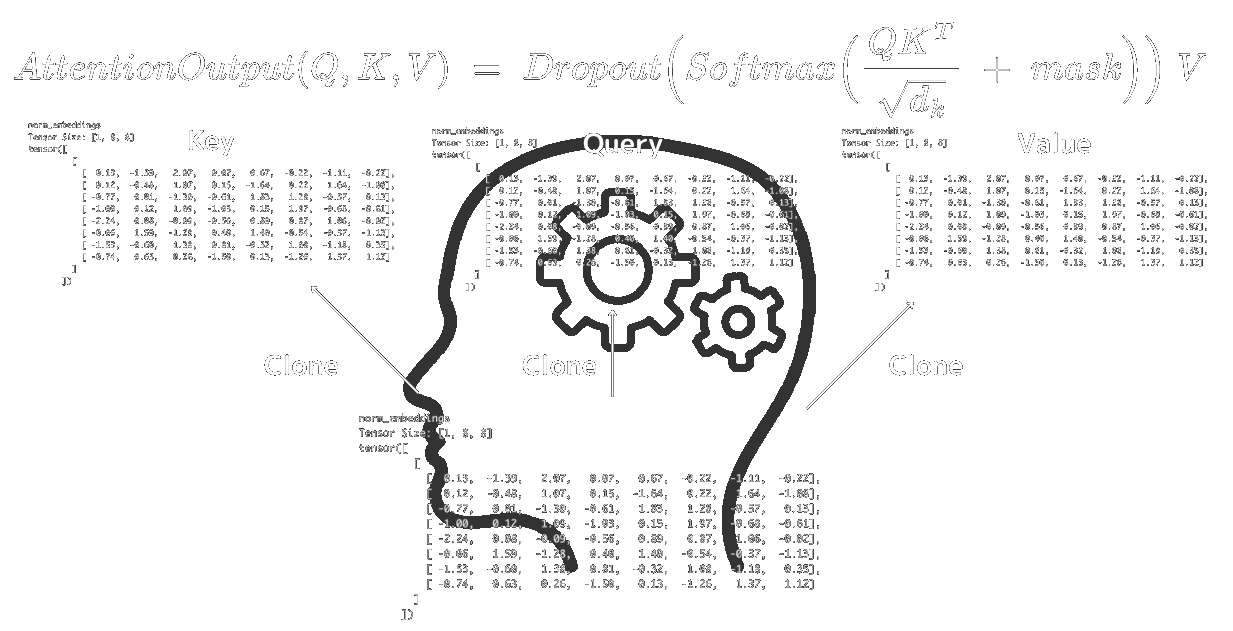

```
Variable: norm_embeddings  
Method: clone  
Arguments: None  
```

```
new_variable = original_variable.method(arguments)  
```

In [ ]:
# Single Head Attention
key_tensor = # TODO: original_variable.method(arguments)
query_tensor = # TODO: original_variable.method(arguments)
value_tensor = # TODO: original_variable.method(arguments)

First, clone the normalized embedding tensor as is, and use it for the Key, Query, and Value.

So, as you can see in the diagram, Key, Query, and Value are all the same tensor.  

**Head**

A "head" means the whole process of generating Key, Query, and Value tensors and calculating the Attention output.

This time, only one set of Key, Query, and Value is used, so there is just one head. Let’s call it Single Head Attention.  
(Note: In real Single Head Attention, linear transformations apply to Key, Query, and Value, but that’s skipped here.)

---

The most important part is the Query tensor, which sets the viewpoint.  
Next, let’s check the shape of the Query tensor.


In [ ]:
print_formatted_tensor("query_tensor", query_tensor)

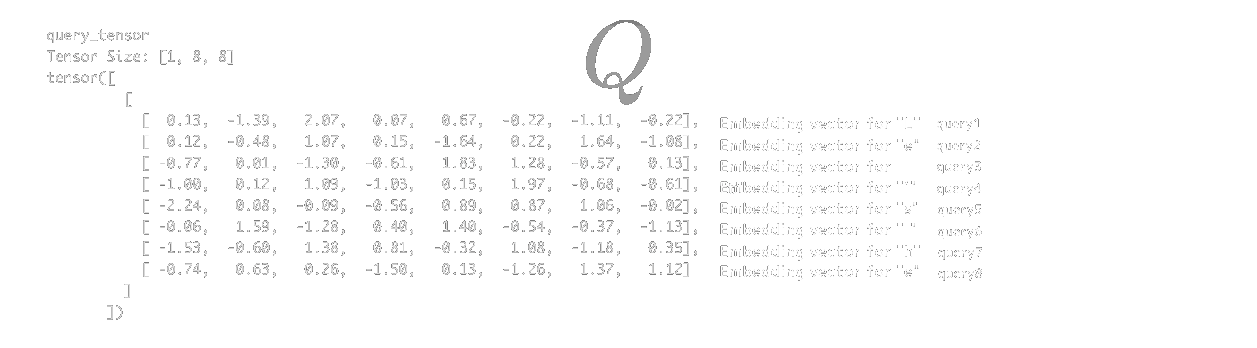

The Query tensor is made by simply cloning the normalized embedding tensor.<br>
So, $query_{i}$ is exactly the normalized embedding vector for the $i$-th string.

<br>

Next, let's check the Key tensor.

In [ ]:
print_formatted_tensor("key_tensor", key_tensor)

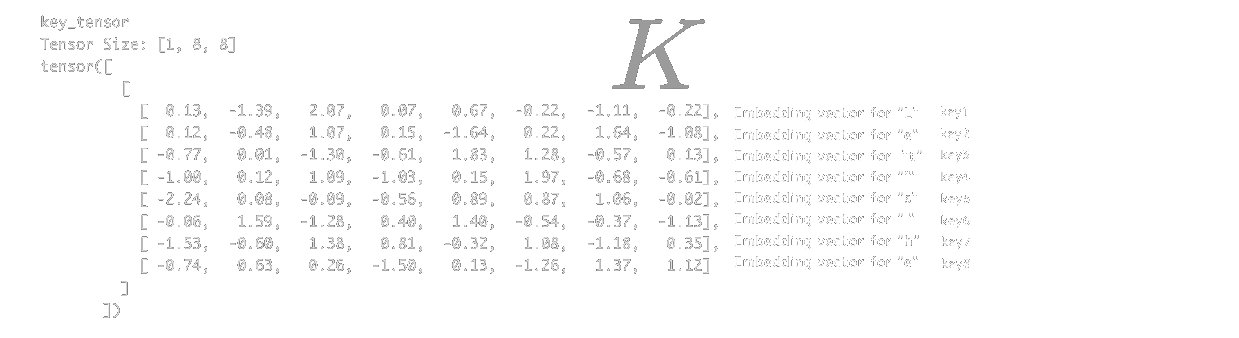

Since the Key tensor is a direct clone of the normalized embedding tensor,

$key_{i}$ is the normalized embedding vector for the $i$-th string itself.

Now, let’s move on to calculating the AttentionOutput below.

$$
{AttentionOutput}(Q, K, V)
\;=\;
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)\;V
$$

<br>
<br>

First, let’s calculate attention weights using Query and Key.

$$
{AttentionWeights}=\frac{Q\,K^T}{\sqrt{d_k}}
$$

Follow these steps:

1. Transpose the Key tensor  
2. Divide by the square root of the embedding dimension $\sqrt{d_k}$  
3. Take the dot product with the Query tensor from the left

**1. Transpose the Key tensor**

$$
{K^T}
$$

`-2` and `-1` mean "second from last" and "last dimension."<br>
`transpose(-2, -1)` swaps the last two dimensions.<br>
You can also use `transpose(-1, -2)` for the same effect.

In [ ]:
key_transpose = # TODO: key_tensor.transpose (the set of dimensions to be replaced). Swap the second two dimensions.
print_formatted_tensor("Original key_tensor", key_tensor)
print_formatted_tensor("key_transpose", key_transpose)

$$
\frac{K^T}{\sqrt{d_k}}
$$

In [ ]:
# A “head” creates Key, Query, and Value tensors to compute attention.
# The head_size is its embedding dimensionality—in this case, 8.

head_size = 8
key_transpose_scaled = # TODO: Implement the formula.
print_formatted_tensor("key_transpose_scaled", key_transpose_scaled)

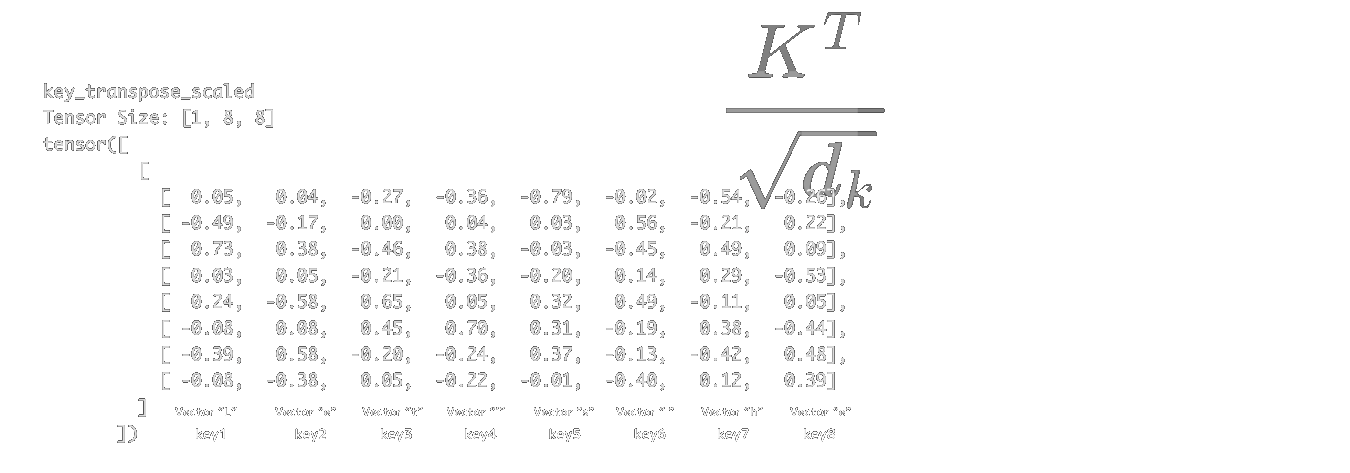

$$
\frac{Q\,K^T}{\sqrt{d_k}}
$$

In [ ]:
attention_weights_before_mask = # TODO: Internal product of query_tensor and key_transpose_tensor
print_formatted_tensor("attention_weights_before_mask", attention_weights_before_mask)

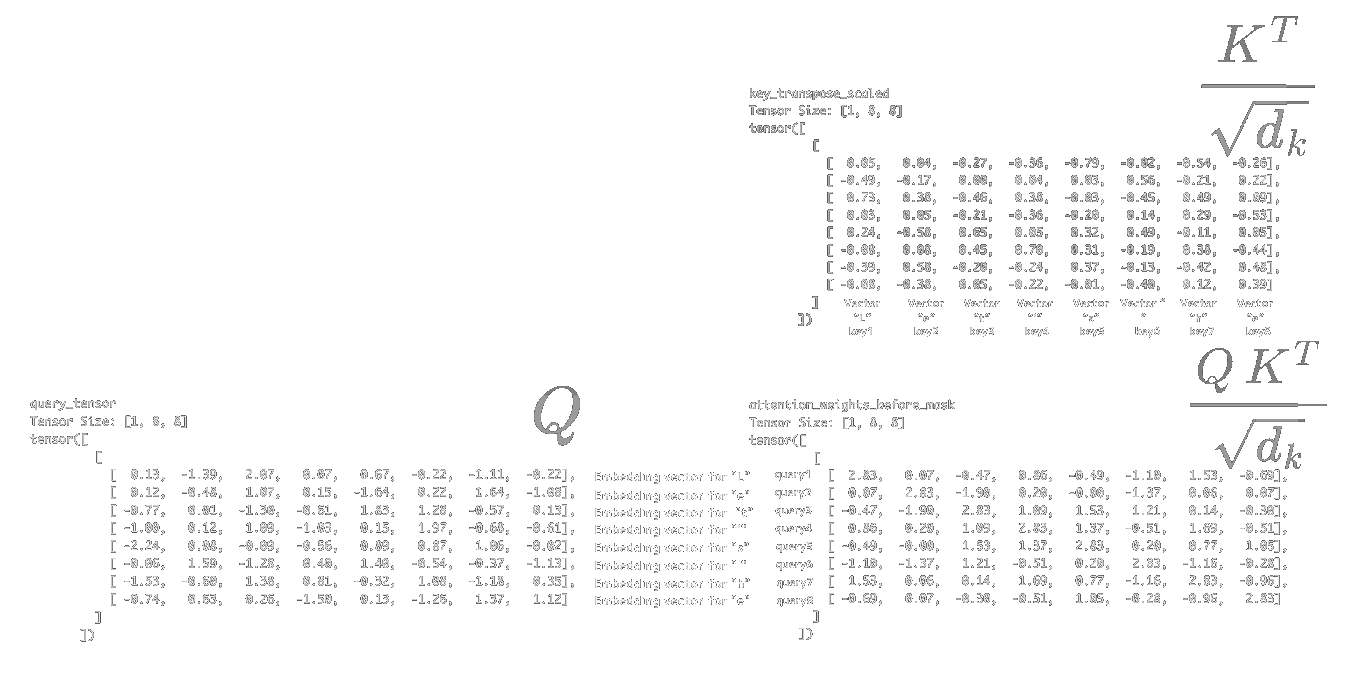

**`Check Point`** <label><input type="checkbox"> ← Check this box if the result above matches the answer below<label>

```
attention_weights_before_mask
Tensor Size: [1, 8, 8]
tensor([
         [
           [  2.83,   0.07,  -0.47,   0.86,  -0.49,  -1.10,   1.53,  -0.69],
           [  0.07,   2.83,  -1.90,   0.20,  -0.00,  -1.37,   0.06,   0.07],
           [ -0.47,  -1.90,   2.83,   1.09,   1.53,   1.21,   0.14,  -0.30],
           [  0.86,   0.20,   1.09,   2.83,   1.37,  -0.51,   1.69,  -0.51],
           [ -0.49,  -0.00,   1.53,   1.37,   2.83,   0.20,   0.77,   1.05],
           [ -1.10,  -1.37,   1.21,  -0.51,   0.20,   2.83,  -1.16,  -0.28],
           [  1.53,   0.06,   0.14,   1.69,   0.77,  -1.16,   2.83,  -0.96],
           [ -0.69,   0.07,  -0.30,  -0.51,   1.05,  -0.28,  -0.96,   2.83]
         ]
       ])
```

Visualize the output `attention_weights_before_mask` as a heatmap.

In [ ]:
# The following is a code that is just visualized, so you can skip it
attention_weights_numpy = attention_weights_before_mask.detach().cpu().numpy()[0]  # shape: (sequence_length, sequence_length)
sequence_length = 8

# Label definition
query_labels = [
    'query1 "L"', 'query2 "e"', 'query3 "t"', 'query4 "\'"',
    'query5 "s"', 'query6 " "', 'query7 "h"', 'query8 "e"'
]

key_labels = [
    'key1 "L"', 'key2 "e"', 'key3 "t"', 'key4 "\'"',
    'key5 "s"', 'key6 " "', 'key7 "h"', 'key8 "e"'
]

# Small size & compact display with small font
fig, ax = plt.subplots(figsize=(4, 4))
heatmap = ax.imshow(attention_weights_numpy, aspect='equal')

for i in range(sequence_length):
    for j in range(sequence_length):
        ax.text(
            j, i,
            f"{attention_weights_numpy[i, j]:.2f}",  # 小数点以下2桁表示
            ha='center', va='center',
            color='red',
            fontsize=6
        )

# Custom label settings (font size also specified)
ax.set_xticks(range(sequence_length))
ax.set_xticklabels(key_labels, rotation=45, ha='right', fontsize=8)
ax.set_yticks(range(sequence_length))
ax.set_yticklabels(query_labels, fontsize=8)

ax.set_xlabel('Key Positions', fontsize=10)
ax.set_ylabel('Query Positions', fontsize=10)
ax.set_title('Attention Weights Heatmap', fontsize=12)

plt.tight_layout(pad=1.0)
plt.show()

Attention weights show how much each query blends its values.<br><br>

For example, from the view of `query_1` (the token “L”),<br>
the `key_1` vector, matching the same “L,” scores highest.<br>
So it pulls in more of `value_1`.<br><br>

Note this similarity comes from a random, untrained model.<br>
Training will decide what really matters.<br>
For now, just remember:<br>
higher similarity means more value mixing.<br><br>

**The key point:**<br>
"Similarity" here doesn't just mean true synonyms, like “violin” and “cello.”<br> <br>
In (self-)attention, similarity also shows context links.<br>
It finds words that belong together.<br> <br>
For example:<br>

> “The chef chopped onions with a knife.”<br>
> Here, “chopped” links strongly to “chef” and “knife.”<br>
> That shows who acted and with what.<br>

These links help the model grasp real context.

**Create a Mask**

$$
\frac{QK^{T}}{\sqrt{d_{k}}}
\;+\;
{mask}
$$

In [ ]:
head_size = 8
mask = # TODO: Create a mask. See Section 5.
print_formatted_tensor("mask", mask)

In [ ]:
attention_weights_masked = # TODO: Apply mask to `attention_weights_before_mask`. See Section 5.
print_formatted_tensor("attention_weights_tril", attention_weights_masked)

**Softmax**

$$
{Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
$$

In [ ]:
import torch.nn.functional as F
attention_weights_softmax = F.softmax(attention_weights_masked, dim=-1)
print_formatted_tensor("attention_weights_softmax", attention_weights_softmax)

$$
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)
$$

In [ ]:
dropout = DeterministicDropout()
attention_weights_dropout = dropout.forward(attention_weights_softmax)
print_formatted_tensor("attention_weights_dropout", attention_weights_dropout)

| attention\_weights\_dropout            | Value1  | Value2 | Value3 | Value4 | Value5 | Value6 | Value7 | Value8 |
| -------------------------------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| Mixing Ratio From Query1's perspective | 1.11   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query2's perspective | 0.07   | 1.04   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query3's perspective | 0.04   | 0.01   | 1.06   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query4's perspective | 0.11   | 0.06   | 0.14   | 0.80   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query5's perspective | 0.03   | 0.04   | 0.19   | 0.00   | 0.69   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query6's perspective | 0.02   | 0.00   | 0.00   | 0.03   | 0.06   | 0.83   | 0.00   | 0.00   |
| Mixing Ratio From Query7's perspective | 0.16   | 0.04   | 0.04   | 0.19   | 0.08   | 0.01   | 0.59   | 0.00   |
| Mixing Ratio From Query8's perspective | 0.02   | 0.05   | 0.00   | 0.03   | 0.13   | 0.04   | 0.02   | 0.79   |



From each query's perspective, it figured out how to mix value1, value2, ..., value8!

Now, all that's left is to actually mix them!

Let’s check the Value tensor!

In [ ]:
print_formatted_tensor("value tensor", value_tensor)

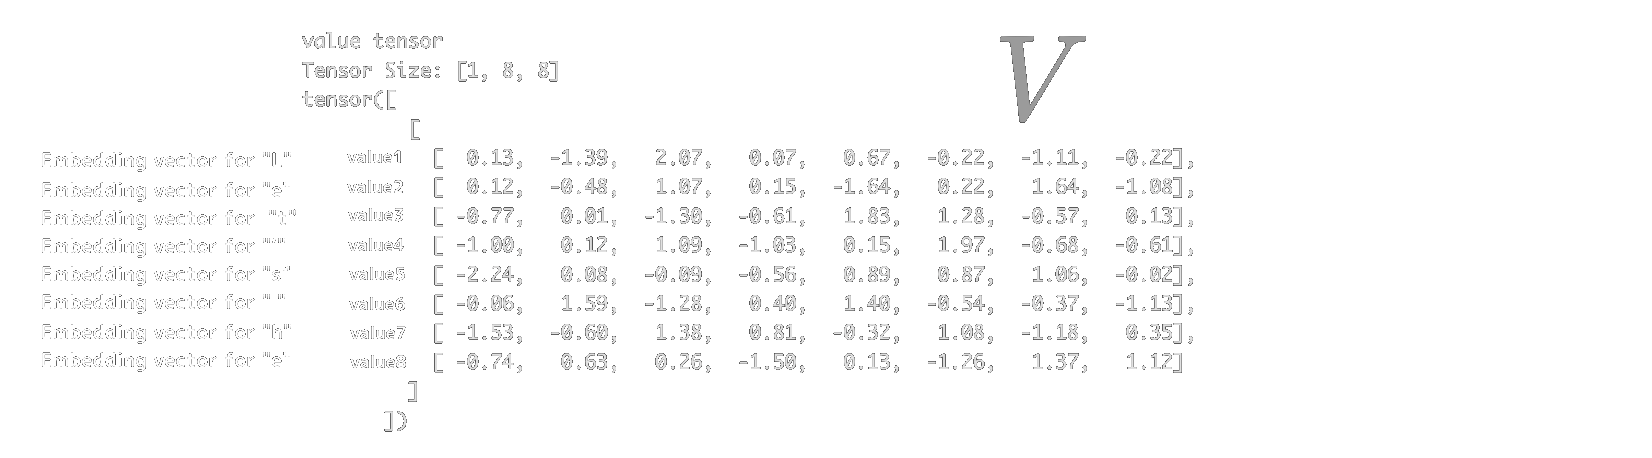

$$
{AttentionOutput}(Q, K, V)
\;=\;
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)\;V
$$

In [ ]:
attention_output = # TODO: Take the dot product of `attention_weights_dropout` and `value_tensor`
print_formatted_tensor("attention_output", attention_output)

This completes the calculation of the AttentionOutput for Single Head Attention!

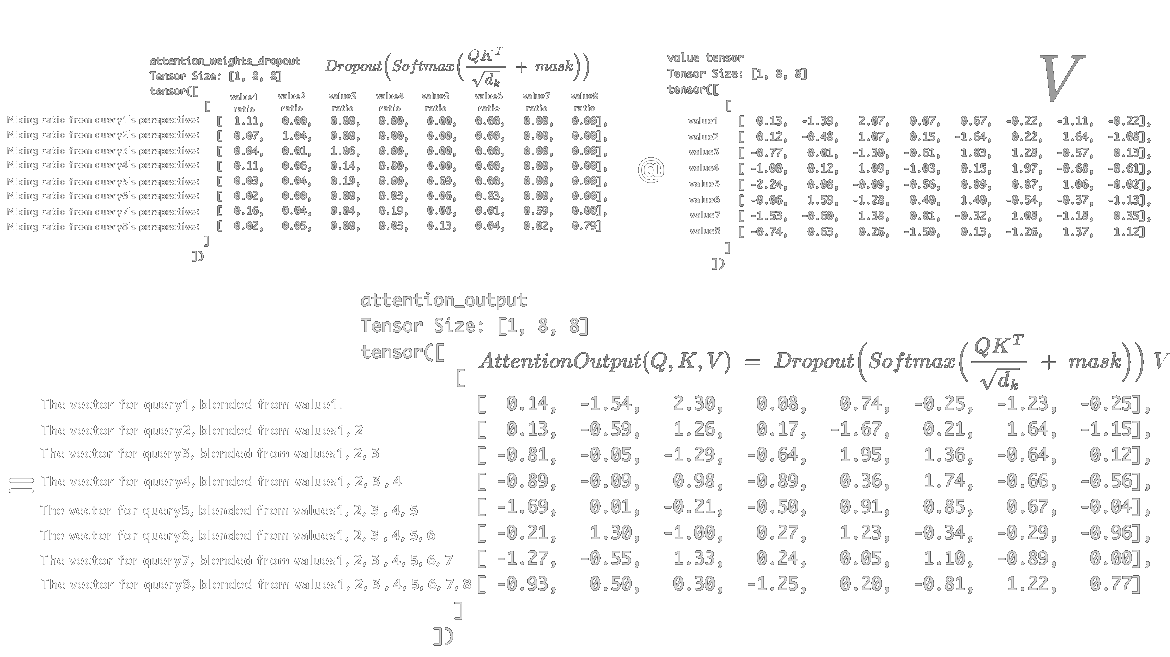

**`Chapter 6: Section 7: Single Head Attention`** <label><input type="checkbox"> Mark as completed</label>

### **Section 8: Multi-Head Attention**

In Single Head Attention, there are 8 query vectors: query1, query2, ..., query8.

In other words, it mixes things from 8 different viewpoints.

Do you think 8 viewpoints are a lot or a few?

It's more like "a few."

So, instead of a single big head, the model uses several small heads.

This is called Multi Head Attention.

For example, if you create two heads,<br>
each head has as many queries as tokens (8),<br>
so you get 8 × 2 = 16 queries.<br><br>
That lets you see from more diverse perspectives.

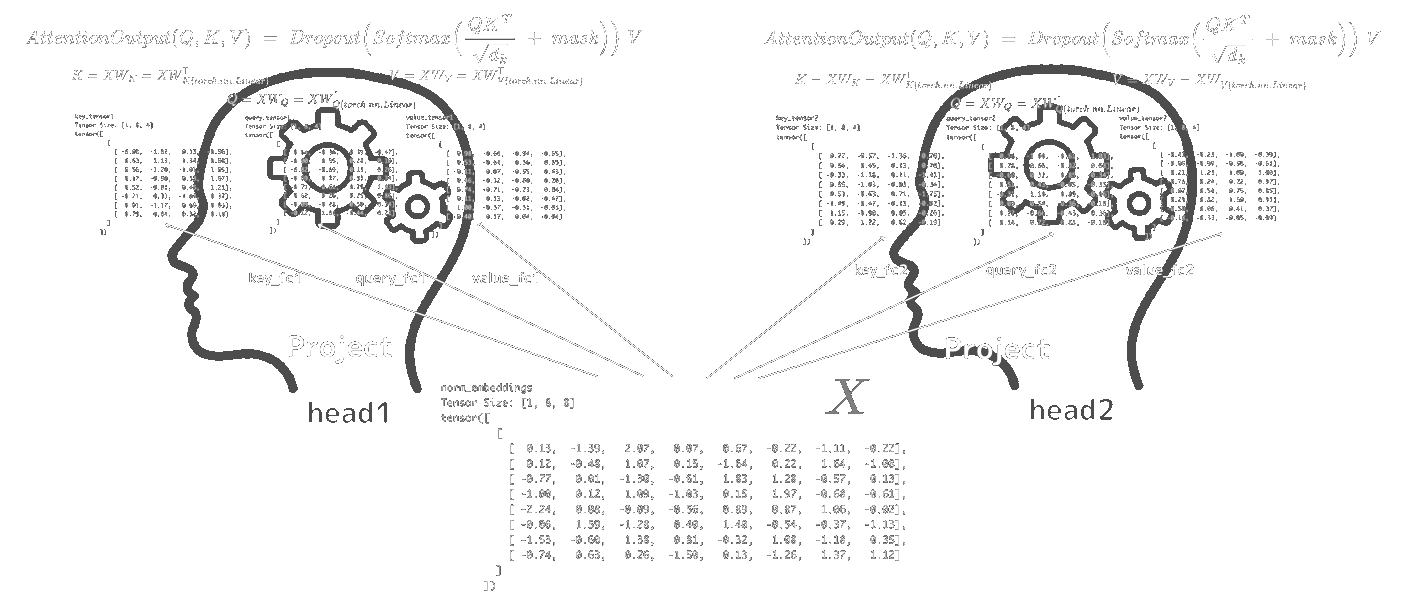

**Calculating Head Size**

As an example, split an 8-dimensional embedding tensor into 2 heads.

So, the embedding dimension per head is 8 / 2 = 4.

This embedding dimension per head is called the head size. Here, head_size = 4.

**Why not give each head all 8 dims?**<br>
If you did, you’d get 8 + 8 = 16 dims.<br>
With more heads, it would just grow.<br>

So, having 4 dimensions per head × 2 heads keeps the tensor size.

$$
\text{Head size} = \frac{\text{Embedding dimension}}{\text{Number of heads}} \ \ = \frac{8}{2} = 4
$$

In [ ]:
embedding_dim = 8
num_heads = 2
head_size = # TODO: When the number of heads is 2, calculate the head size.
head_size = int(head_size) # convert `head_size` in float to integer.
print(head_size)

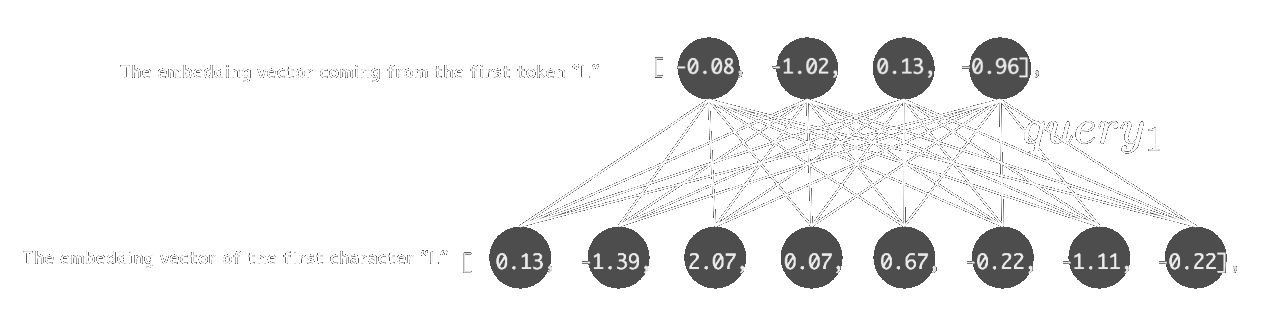

In order to make a 4-dimensional query from an 8-dimensional vector, <br>
use a fully connected layer as shown in the figure.

The query1 is made from the embedding vector of the first character, `L`.<br>
Then, query2 is made from the vector of the second character, `e`, and so on.<br>

Looking at the figure above, you can see the fully connected layer has 8 x 4 = 32 weights.<br>
<br>

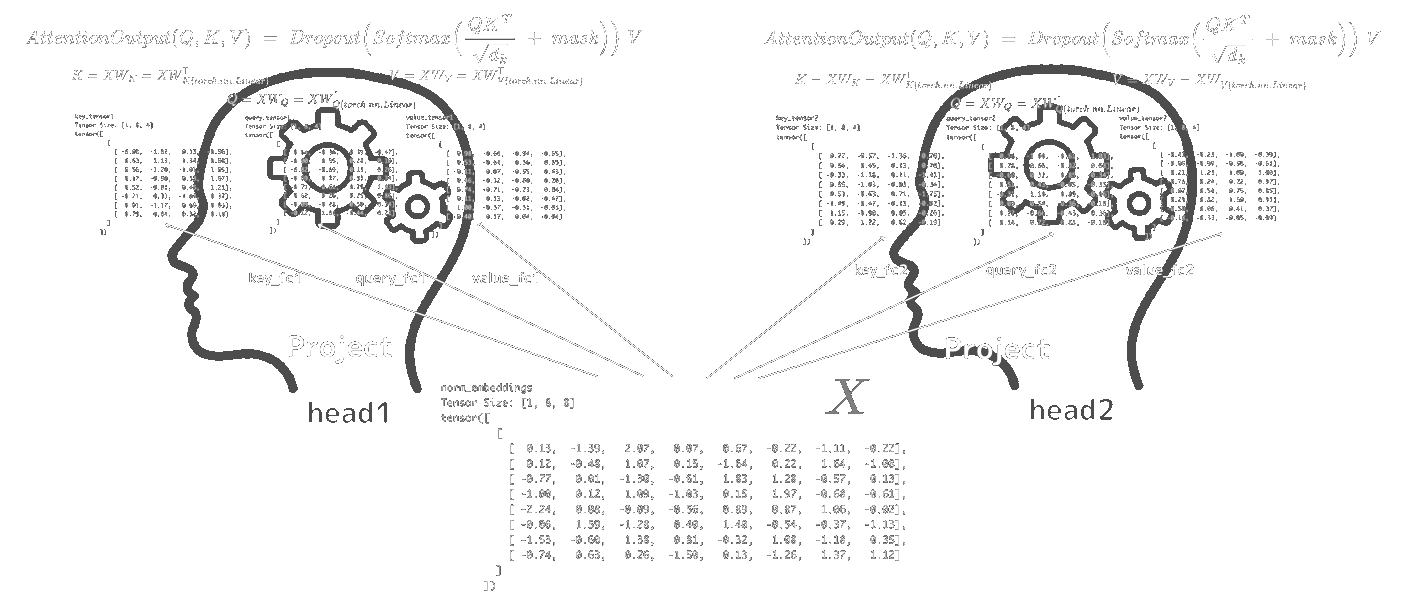

One head has one query_fc (fully connected layer to generate query tensor). <br>
Within the same head, the weights are the same when making query1 and query2.<br>
<br>
But each head has different fully connected layer.<br>
Each head (a set of K, Q, V) has its own set of fully connected layers (key_fc, query_fc, value_fc).<br>
That lets each head produce different queries, diversifying viewpoints.

Here, imagine boosting num\_heads to raise queries more.<br><br>
For example, use 8 heads.<br>
You get 8 queries × 8 heads = 64 queries!<br><br>
But then head\_size becomes 1 dimension.<br>
That really hurts expressiveness.

Above equation can be rewritten as:

$$
\text{Number of heads} \times \text{Head size} = \text{Embedding dimension} = \text{constant}
$$

It’s in the form $x y = C$.
This shows a trade-off.

If you add too many heads, head\_size shrinks a lot.
That cuts expressiveness.

Let’s see a real example:

| Model                       | embed dim | num\_heads | head\_size (embed dim ÷ num\_heads) |
| --------------------------- | -----------------------: | ---------: | ----------------------------------: |
| GPT-1 (Radford et al. 2018) |                      768 |         12 |                                  64 |
| GPT-2 Small                 |                      768 |         12 |                                  64 |
| GPT-2 Medium                |                     1024 |         16 |                                  64 |
| GPT-2 Large                 |                     1280 |         20 |                                  64 |

Look at GPT-2 Large.

Each fully connected layer projects 1280-dim input tensor to 64-dim Q (or K, V) tensor.

That’s **huge** dimension reduction. Of course, this reduction causes information drop.

Yet neural nets can summarize information well.

Remember VAE. NNs can encode and rebuild a 764-dim MNIST image from 3-dim latents.

NNs excel at information summarization.

So even if dims shrink, with enough training, fully connected layers learn to project and keep essential information to get context and predict a next token.

It stops needed info from getting dropped.

In addition, each head uses its own projection layer.
So each head creates different queries.

Parallel small projections drop info in varied subspaces.
That way, important features stay in some heads.

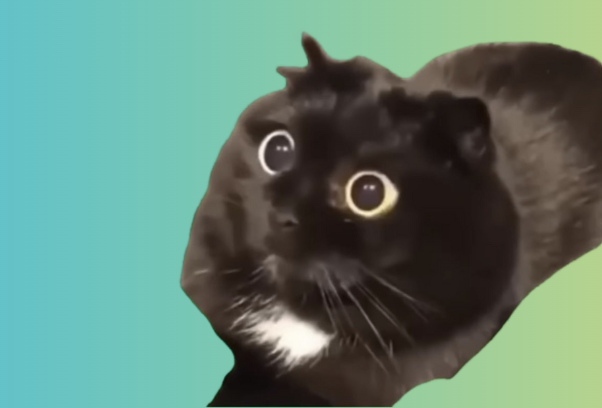

**What If ... We Just Made Embedding dimensions huge?**

| Model                       | embed dim | num\_heads | head\_size (embed dim ÷ num\_heads) |
| ------------- | -----------------: | --: | ---------: |
| GPT-3 (175 B) |              12288 |  96 |        128 |

For GPT-3 (175 B), the model dimension is an unprecedented 12,288—

now you have 96 heads with generous 128 dimensions.

Here comes the first commercial level large languge model ---

It teaches, codes, and even chats about love with us.

What a fantastic invention!

---

But it needs huge compute and memory—
so plain multi-head attention fell out of favor at present.

Now you see smarter designs:

| Model              | Attention Type                |
| ------------------ | ----------------------------- |
| LLaMA 2-7B & 13B   | Multi-Query Attention (MQA)   |
| LLaMA 3 (8B & 70B) | Grouped-Query Attention (GQA) |
| DeepSeek-R1        | Multi-Latent Attention (MLA)  |

This tutorial doesn't delve into this, because it is hard to understand for early birds.

But I know you are too eager to wait. This [Video](https://youtu.be/0VLAoVGf_74?feature=shared)¹ will fulfill your interest.

Content Reference: ¹ **Welch Labs**, “The Genius of DeepSeek’s 57X Efficiency Boost [MLA],” YouTube, 24:05, Mar. 8 2025. Accessed July 5 2025.

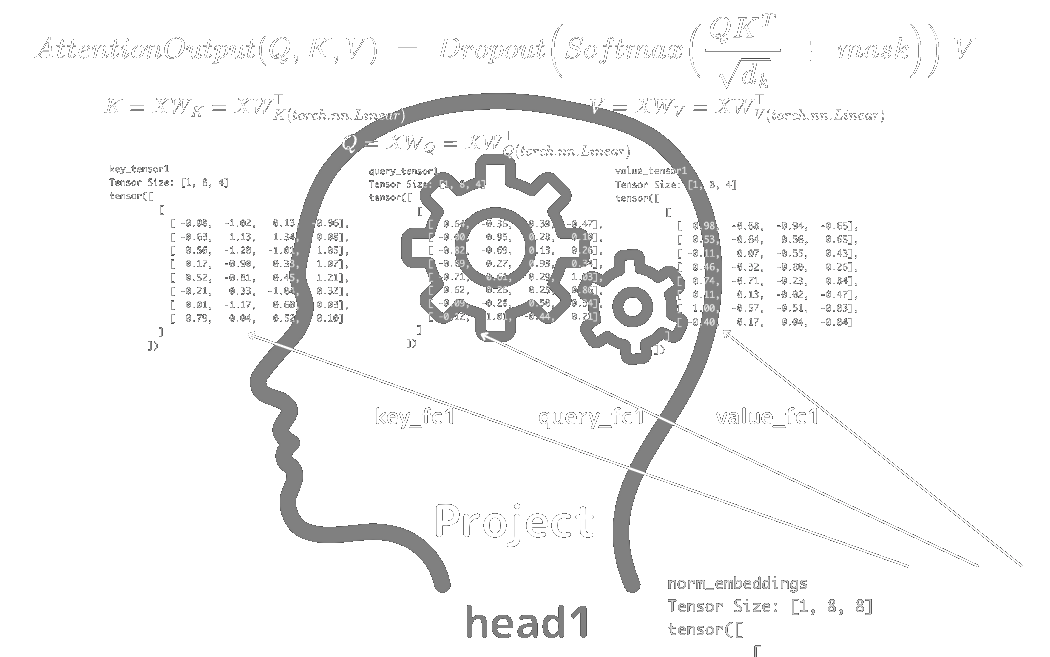

**Generating Query, Value, and Key in GPT**

Create three fully connected layers with `nn.Linear(embedding_dim, head_size, bais=False)`.

Pass the original Query, Value, and Key through these three different fully connected layers.

Use the outputs as the new Query, Value, and Key.

Before training, the weights in the layers are initialized randomly.

Without bias, each head’s output is a pure linear projection.

As training progresses, the layers learn to generate appropriate Q, K, V to predict next token.

```python
Instance: nn.Linear(input_dim, output_dim, bias)
input_dim: embedding_dim  # 8
output_dim: head_size  # 4
bias: False
```

```python
Instance: key_fc1, query_fc1, value_fc1,
Method: forward
Argument: norm_embeddings
```

In [ ]:
torch.manual_seed(1337) # Adjust a seed value
config = ModelConfig()

# Adjust a seed value
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
embedding_dim = 8
head_size = 4

key_fc1 = # TODO: Define nn.Linear(input dimension, output dimension, bias)
key_tensor1 = # TODO: Apply instance. Method (argument)
print_formatted_tensor("\nkey_tensor1", key_tensor1)

query_fc1 = # TODO: Define nn.Linear(input dimension, output dimension, bias)
query_tensor1 = # TODO: Apply instance. Method (argument)
print_formatted_tensor("\nquery_tensor1", query_tensor1)

value_fc1 = # TODO: Define nn.Linear(input dimension, output dimension, bias)
value_tensor1 = # TODO: Apply instance. Method (argument)
print_formatted_tensor("\nvalue_tensor1", value_tensor1)

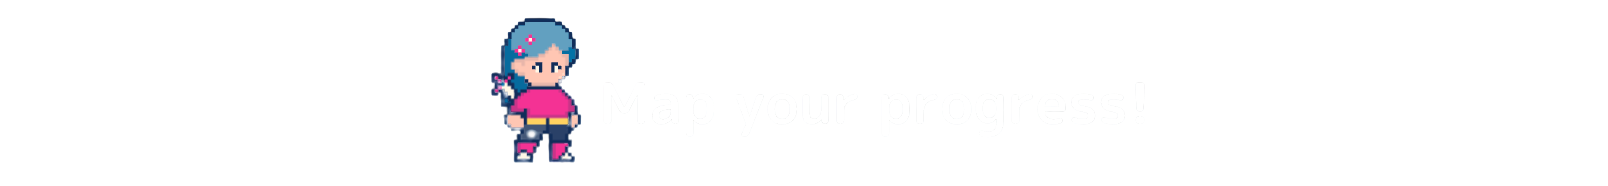

**Note:** Since we set `bias=False`, there is no bias term $b$.

---

Let’s also check the weights of each fully connected layer: $W_K$, $W_Q$, and $W_V$.

There is a subtle difference between the usual matrix-multiplication notation and PyTorch’s `nn.Linear`:

* **Mathematical form:** if you project an input $X\in\mathbb{R}^{T\times D}$ (here $T=8$, $D=8$) down to a smaller dimension $d=4$, you’d write

  $$
    Y = X\,W
    \quad\text{with}\quad
    W\in\mathbb{R}^{D\times d}.
  $$

  Concretely, $X\in\mathbb{R}^{8\times 8}$, $W\in\mathbb{R}^{8\times4}$, and thus $Y\in\mathbb{R}^{8\times4}$.
  In particular, $W$ has shape $(8,4)$.

* **PyTorch `nn.Linear`**: internally stores its weight as

  $$
    W_{\text{torch.nn.Linear}}\;\in\;\mathbb{R}^{d\times D},
  $$

  and computes

  $$
    Y = X\,W_{\text{torch.nn.Linear}}^{T}.
  $$

  I.e. it transposes its stored weight before doing the dot-product. Concretely, `linear.weight.shape == (4,8)`.

---

**Key formulas**

1. **Textbook**

   $$
   Y = X\,W,\quad
   X\in\mathbb{R}^{8\times8},\;
   W\in\mathbb{R}^{8\times4}.
   $$

2. **PyTorch `nn.Linear(8,4)`**

   $$
   Y = X\,W_{\text{torch.nn.Linear}}^{T},\quad
   X\in\mathbb{R}^{8\times8},\;
   W_{\text{torch.nn.Linear}}\in\mathbb{R}^{4\times8}.
   $$

|            |                          | Weight Shape                                               | Implemented Calculation Formula | Output Shape |
| :--------: | :--------------------------- | :--------------------------------------------------------- | :----------------------------------------------------- | :--------- |
| **In Math** | ${W}$                      | `(8, 4) = (embedding dimension, head size)`               | $Y = X \mathbin{@} W$                                 | `(8, 4)`   |
| **In Code** | $W_{{torch.nn.Linear}}$ | `(4, 8) = (head size, embedding dimension)`               | $Y = X \mathbin{@} W_{{torch.nn.Linear}}^{\!\top}$  | `(8, 4)`   |


In [ ]:
print_formatted_tensor("\nkey_fc1.weight", key_fc1.weight) # Show key_fc weights

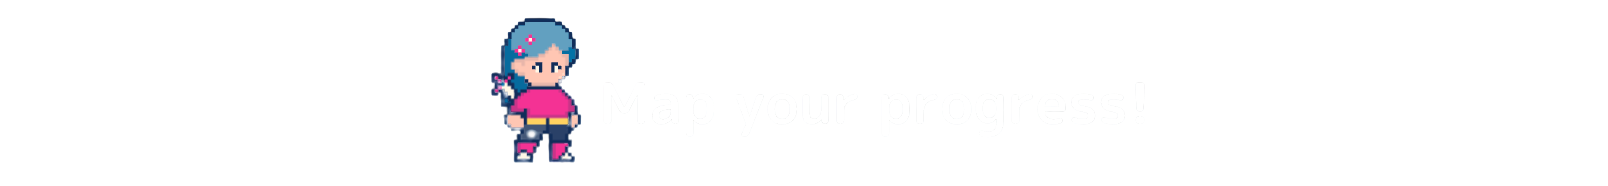

In [ ]:
print_formatted_tensor("\nquery_fc1.weight", query_fc1.weight) # Display query_fc weights
print_formatted_tensor("\nvalue_fc1.weight", value_fc1.weight) # Display weights for value_fc

Usually, you don’t have to think about this, but it’s super important when deploying deep learning models as APIs.

It’s no exaggeration to say that half of deployment errors come from how PyTorch handles tensor transposes.

**`Chapter 6: Section 8: Multi-Head Attention`** <label><input type="checkbox"> Mark as Done</label>

### **Section 9: Forward**

`-2` and `-1` mean "the second last" and "the last dimension." <br>
`transpose(-2, -1)` swaps the last two dimensions. <br>
You can also use `transpose(-1, -2)`—both work fine.

In [ ]:
key_transpose1 = key_tensor1.transpose(-2, -1)
print_formatted_tensor("key_transpose1", key_transpose1)

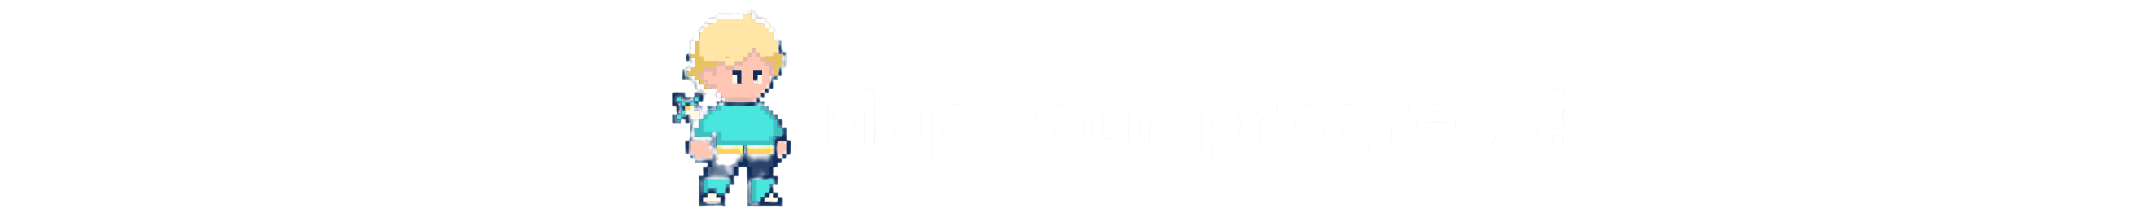

In [ ]:
num_heads = 2
head_size = int(embedding_dim / num_heads) # 8/2 = 4
key_transpose_scaled1 = key_transpose1 * head_size ** (-0.5)
print_formatted_tensor("key_transpose_scaled1", key_transpose_scaled1)

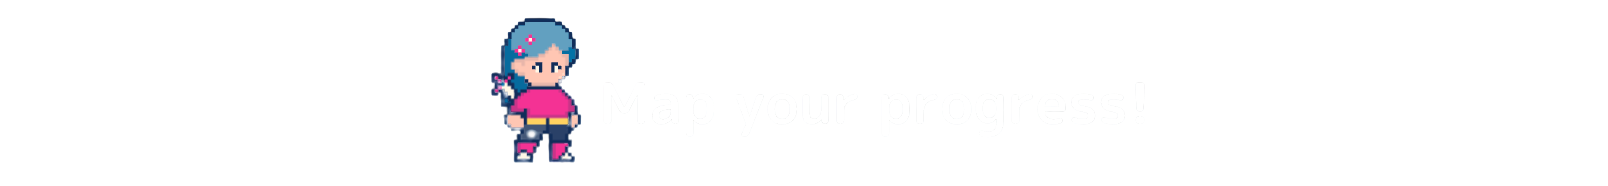

In [ ]:
attention_weights_before_mask1 = query_tensor1 @ key_transpose_scaled1
print_formatted_tensor("attention_weights_before_mask1", attention_weights_before_mask1)

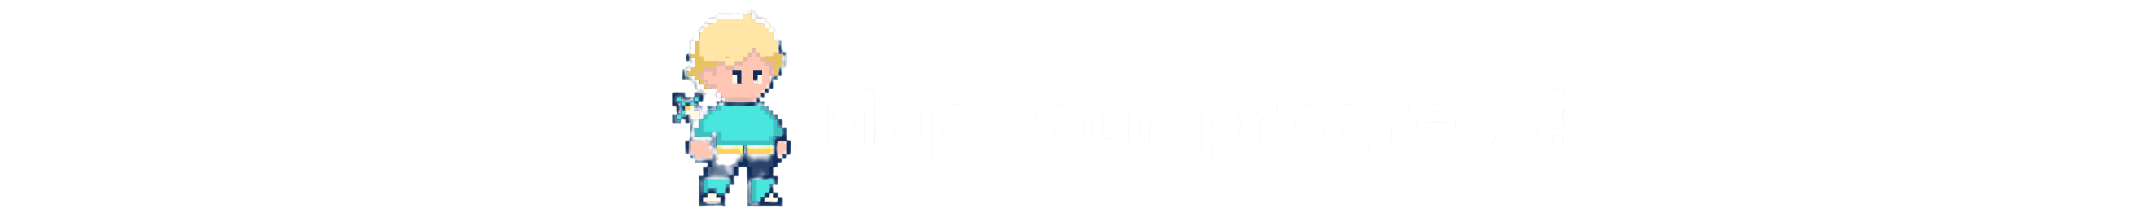

In [ ]:
mask = torch.triu(torch.ones(1, 8, 8), diagonal=1)
print_formatted_tensor("mask", mask)

In [ ]:
attention_weights_masked1 = attention_weights_before_mask1.masked_fill(mask == 1, float('-inf'))
print_formatted_tensor("attention_weights_masked1", attention_weights_masked1)

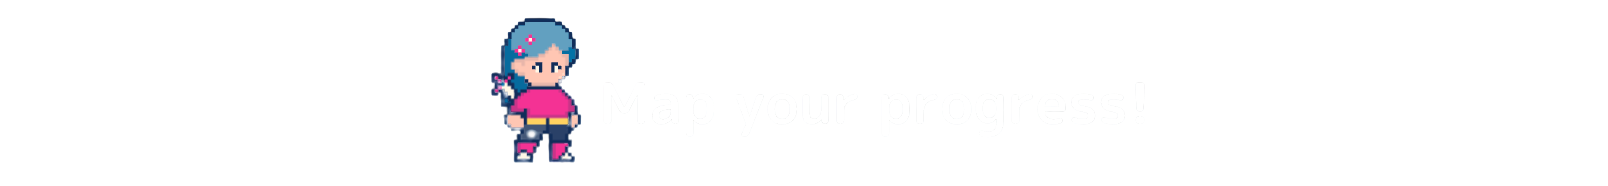

In [ ]:
import torch.nn.functional as F
attention_weights_softmax1 = F.softmax(attention_weights_masked1, dim=-1)
print_formatted_tensor("attention_weights_softmax1", attention_weights_softmax1)

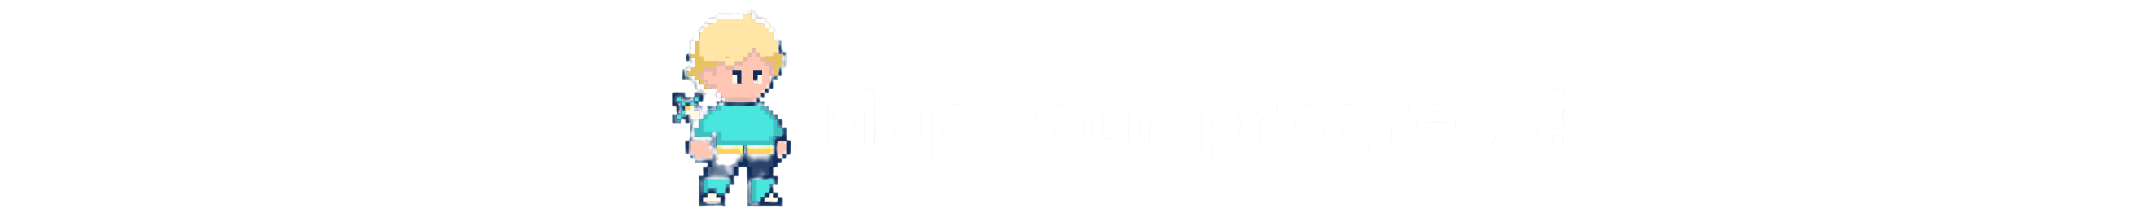

```python
Instance: dropout
Method: forward (or optional)
Argument: attention_weights_softmax
```

In [ ]:
dropout = DeterministicDropout()
attention_weights_dropout1 = dropout.forward(attention_weights_softmax1)
print_formatted_tensor("attention_weights_dropout1", attention_weights_dropout1)

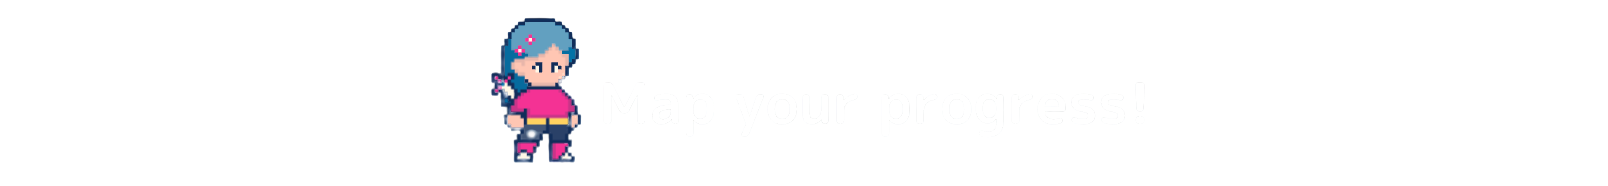

| attention\_weights\_dropout1           | Value1 | Value2 | Value3 | Value4 | Value5 | Value6 | Value7 | Value8 |
| -------------------------------------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| Mixing Ratio From Query1's perspective | 1.11   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query2's perspective | 0.25   | 0.86   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query3's perspective | 0.41   | 0.30   | 0.40   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query4's perspective | 0.17   | 0.58   | 0.11   | 0.25   | 0.00   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query5's perspective | 0.08   | 0.41   | 0.15   | 0.00   | 0.23   | 0.00   | 0.00   | 0.00   |
| Mixing Ratio From Query6's perspective | 0.08   | 0.00   | 0.00   | 0.23   | 0.28   | 0.14   | 0.00   | 0.00   |
| Mixing Ratio From Query7's perspective | 0.13   | 0.16   | 0.14   | 0.19   | 0.20   | 0.10   | 0.18   | 0.00   |
| Mixing Ratio From Query8's perspective | 0.09   | 0.22   | 0.00   | 0.11   | 0.11   | 0.25   | 0.08   | 0.14   |

In [ ]:
attention_output1 = attention_weights_dropout1 @ value_tensor1
print_formatted_tensor("attention_output1", attention_output1)

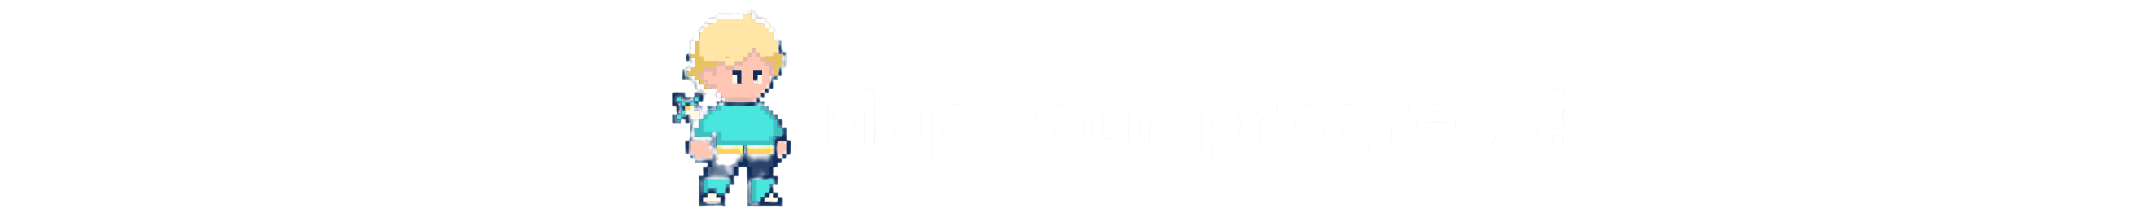

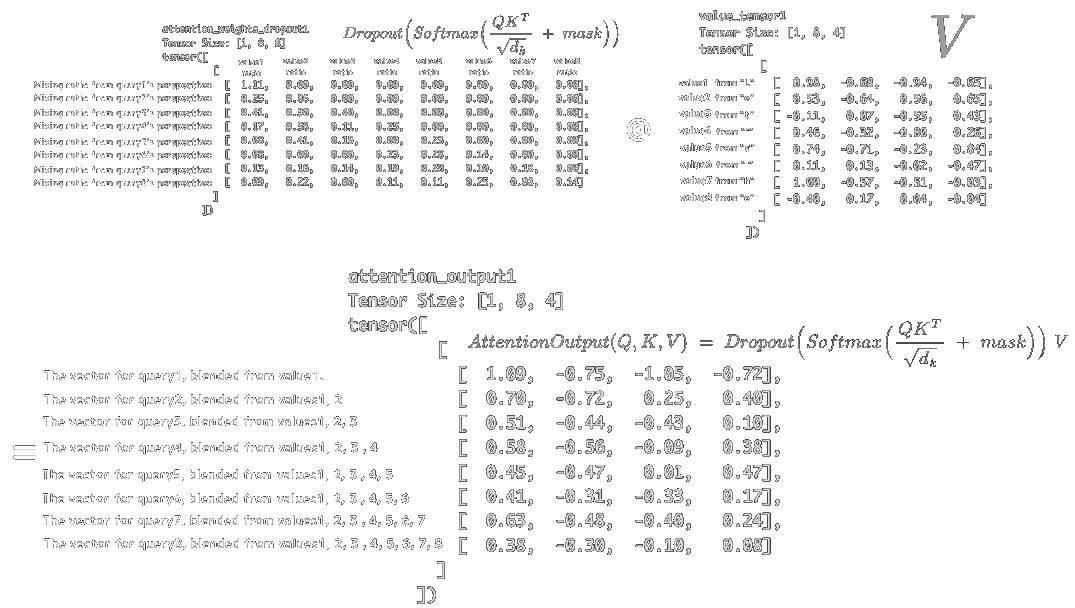

**`Section 11: forward`** <label><input type="checkbox"> Mark as done</label>

### **Section 10: Define a Class**

🔘 **Options**: There may be extra options you don't need.

`head_size`　　`config.embedding_dim`　　`mask == 1`　　`mask == 0`　　`forward`　　`nn.Linear`　　`self.key_fc`　　`Key`　　`Query`　　`Value`　　`F.softmax`　　`self.dropout`

In [ ]:
class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(______________, ________, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # Masks are created using the lower triangular matrix (maintaining the causality of self-attention)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # Dropout (deterministic version is defined separately)
        self.dropout = DeterministicDropout(config.dropout_rate)

        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # Batch, Token Length, Embedding Channel

        Key = __________.forward(input_tensor)     # (B, T, head_size)
        Query = self.query_fc.forward(input_tensor)   # (B, T, head_size)
        Value = self.value_fc.forward(input_tensor)   # (B, T, head_size)

        # Calculating Attention score (QK^T) / sqrt(embedding_dim)
        attention_weights_before_mask = ______ @ ____.transpose(-2, -1) * self.head_size**(-0.5)

        # Mask applied
        mask = torch.triu(torch.ones(T, T), diagonal=1).to(input_tensor.device)
        masked_attention_weights = attention_weights_before_mask.masked_fill(___________, float('-inf'))

        # Softmax → Dropout → Weighted sum
        attention_weights = ________(masked_attention_weights, dim=-1)
        attention_weights = _____________(attention_weights)

        out = attention_weights @ _____  # (B, T, head_size)
        return out

<details>
<summary>Click here to show/hide answer</summary>

```python
class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(config.embedding_dim, head_size, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # Masks are created using the lower triangular matrix (maintaining the causality of self-attention)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # Dropout (deterministic version is defined separately)
        self.dropout = DeterministicDropout(config.dropout_rate)

        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # Batch, Token Length, Embedding Channel

        Key = self.key_fc.forward(input_tensor)     # (B, T, head_size)
        Query = self.query_fc.forward(input_tensor)   # (B, T, head_size)
        Value = self.value_fc.forward(input_tensor)   # (B, T, head_size)

        # Calculating Attention score (QK^T) / sqrt(embedding_dim)
        attention_weights_before_mask = Query @ Key.transpose(-2, -1) * self.head_size**(-0.5)

        # Mask applied
        mask = torch.triu(torch.ones(T, T), diagonal=1).to(input_tensor.device)
        masked_attention_weights = attention_weights_before_mask.masked_fill(mask == 1, float('-inf'))

        # Softmax → Dropout → Weighted sum
        attention_weights = F.softmax(masked_attention_weights, dim=-1)
        attention_weights = self.dropout(attention_weights)

        out = attention_weights @ Value  # (B, T, head_size)
        return out
```

In [ ]:
# Configuration class that stores model settings
class ModelConfig:
    batch_size = 1  # Number of data to process at a time (batch size)
    input_sequence_length = 8  # Length of input data (sequence length)
    embedding_dim = 8  # Embedded layer size (number of dimensions of feature vector)
    dropout_rate = 0.1  # Dropout probability

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1337)

# Creating a ModelConfig instance. No configuration parameters (constructors).
config = ModelConfig()
# Calculating head_size
num_heads = 2
head_size = int(config.embedding_dim / num_heads)

# Creating an EmbeddingModule instance.
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
layer_norm = nn.LayerNorm(config.embedding_dim)
attention_head = AttentionHead(head_size = head_size, config = config)

# Compatible with Let's he. (Batch size, token length) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

embeddings = embedding_module.forward(sample_input_tokens)
norm_embeddings = layer_norm(embeddings)
attention_output1 = # TODO: Instance.Method(Argument)
print_formatted_tensor("attention_output1", attention_output1)

**`Check Point`** <label><input type="checkbox"> ← Check this box if the result above matches the answer below<label>

```
attention_output1
Tensor Size: [1, 8, 4]
tensor([
         [
           [  1.09,  -0.75,  -1.05,  -0.72],
           [  0.70,  -0.72,   0.25,   0.40],
           [  0.51,  -0.44,  -0.43,   0.10],
           [  0.58,  -0.56,  -0.09,   0.38],
           [  0.45,  -0.47,   0.01,   0.47],
           [  0.41,  -0.31,  -0.33,   0.17],
           [  0.63,  -0.48,  -0.40,   0.24],
           [  0.38,  -0.30,  -0.10,   0.08]
         ]
       ])
```

**`Section 10: Creating a Class`** <label><input type="checkbox"> Mark as Done</label>

**`Chapter 6: AttentionHead Class`** <label><input type="checkbox"> Mark as Done</label>